Looking at Autoantibody results from ImmPort Studies
* SDY1737
* SDY524
* SDY569

* SDY1625
* SDY655 ?
* SDY797 ?
* SDY824
* SDY91

Look at K-Means 
Unsupervised clustering

In [1]:
if (!require("devtools", quietly = TRUE))
    install.packages("devtools", repos = "https://cloud.r-project.org")

In [2]:
if (!require("shiny", quietly = TRUE))
    install.packages("shiny", repos = "https://cloud.r-project.org")

In [3]:
if (!require("tidyHeatmap", quietly = TRUE))
    install.packages("tidyHeatmap", repos = "https://cloud.r-project.org")

tidyHeatmap version 1.12.2
If you use tidyHeatmap in published research, please cite:
1) Mangiola et al. tidyHeatmap: an R package for modular heatmap production 
  based on tidy principles. JOSS 2020.
2) Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.
This message can be suppressed by:
  suppressPackageStartupMessages(library(tidyHeatmap))



Attaching package: ‘tidyHeatmap’


The following object is masked from ‘package:stats’:

    heatmap




In [4]:
if (!require("stemangiola/tidyHeatmap", quietly = TRUE))
    devtools::install_github("stemangiola/tidyHeatmap")

Using GitHub PAT from the git credential store.




S7         (NA     -> 0.2.0 ) [CRAN]
ggplot2    (3.5.2  -> 4.0.0 ) [CRAN]
colorspace (2.1-1  -> 2.1-2 ) [CRAN]
pillar     (1.11.0 -> 1.11.1) [CRAN]
magrittr   (2.0.3  -> 2.0.4 ) [CRAN]
stringr    (1.5.1  -> 1.5.2 ) [CRAN]
patchwork  (1.3.1  -> 1.3.2 ) [CRAN]


Installing 7 packages: S7, ggplot2, colorspace, pillar, magrittr, stringr, patchwork

Installing packages into ‘/Users/adeslatt/Library/R/arm64/4.5/library’
(as ‘lib’ is unspecified)




The downloaded binary packages are in
	/var/folders/f4/f7f3s6113490h0n3lsrlqyqh0000gn/T//RtmpEzPz1s/downloaded_packages
── R CMD build ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
✔  checking for file ‘/private/var/folders/f4/f7f3s6113490h0n3lsrlqyqh0000gn/T/RtmpEzPz1s/remotesb87647a99508/stemangiola-tidyHeatmap-27b34a6/DESCRIPTION’
─  preparing ‘tidyHeatmap’:
✔  checking DESCRIPTION meta-information
─  installing the package to process help pages
─  checking for LF line-endings in source and make files and shell scripts (4.8s)
─  checking for empty or unneeded directories
─  building ‘tidyHeatmap_1.12.1.tar.gz’
   


Installing package into ‘/Users/adeslatt/Library/R/arm64/4.5/library’
(as ‘lib’ is unspecified)



In [5]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager", repos = "https://cloud.r-project.org")


Attaching package: ‘BiocManager’


The following object is masked from ‘package:devtools’:

    install




In [6]:
BiocManager::install("dplyr")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.21 (BiocManager 1.30.26), R 4.5.1 (2025-06-13)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'dplyr'”
Old packages: 'colorspace', 'credentials', 'mockery', 'roxygen2', 'rprojroot',
  'tidyHeatmap', 'usethis', 'boot', 'broom', 'crosstalk', 'curl', 'dbplyr',
  'dtplyr', 'evaluate', 'gargle', 'ggplot2', 'googledrive', 'googlesheets4',
  'later', 'magrittr', 'Matrix', 'pbkrtest', 'pillar', 'ragg', 'rvest',
  'stringr', 'textshaping', 'vroom', 'xfun', 'xml2'



In [7]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [8]:
options(repos = c(CRAN = "https://cloud.r-project.org"))
if (!requireNamespace("tidyr", quietly = TRUE)) install.packages("tidyr")
if (!requireNamespace("dplyr", quietly = TRUE)) install.packages("dplyr")
if (!requireNamespace("tibble", quietly = TRUE)) install.packages("tibble")

library(dplyr)
library(tidyr)
library(tibble)

packageVersion("tidyr")  # should be >= "1.0.0"

[1] ‘1.3.1’

**Function:** *make_aa_heatmaps* 

**Purpose** 

*make_aa_heatmaps* will make as requested a k-means heatmap - clustering by row with k=4 and clustering by autoantboid k = 2.   As generizable as we can given we know the autoantibodies and the heatmaps we want to make.  

In [9]:
# ── minimal deps
library(dplyr)
library(tidyr)
library(tidyHeatmap)
library(ComplexHeatmap)

# ───────────────────────────────────────────────────────────────────────────────
# 1) Small utilities
# ───────────────────────────────────────────────────────────────────────────────
aa_age_to_group <- function(age) {
  grp <- dplyr::case_when(
    is.na(age)    ~ "Missing",
    age < 8       ~ "8-12",
    age <= 12     ~ "8-12",
    age <= 17     ~ "13-17",
    TRUE          ~ "18-30"
  )
  factor(grp, levels = c("8-12","13-17","18-30","Missing"))
}

aa_first_col <- function(df, candidates) {
  hit <- intersect(candidates, names(df))
  if (length(hit)) hit[[1]] else NULL
}

Loading required package: grid

ComplexHeatmap version 2.24.1
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))




In [10]:
# ───────────────────────────────────────────────────────────────────────────────
# 2) Canonicalize + (optionally) restrict visits + longify to Property/Value
#    Works for both formats:
#      - long:   analyte_name_col + analyte_value_col present (e.g., SDY524)
#      - wide:   analytes are columns (e.g., SDY1737)
# ───────────────────────────────────────────────────────────────────────────────
aa_prepare <- function(
  df,
  accession_col,
  sex_col,
  age_group_col = NULL,         # if not given, compute from age_years_col
  age_years_col = NULL,
  analyte_name_col = NULL,      # (long) e.g., "AutoAB"
  analyte_value_col = NULL,     # (long) e.g., "Value"
  analyte_cols = NULL,          # (wide) e.g., c("GAD65","IA_2ic","MIAA","Zn_T8")
  visit_cols = c("Visit_Num","Visitnum","Visit"),
  restrict_visits = NULL        # numeric or -1 (for textual baseline)
) {
  stopifnot(accession_col %in% names(df), sex_col %in% names(df))

  out <- df %>%
    dplyr::rename(
      Accession = !!rlang::sym(accession_col),
      Sex       = !!rlang::sym(sex_col)
    )

  # ---- Age grouping (canonical labels)
  AGE_LEVELS <- c("0-7","8-12","13-17","18-30",">30","Missing")
    
    # replace aa_age_to_group() inside aa_prepare() with:
    aa_age_to_group <- function(x) {
        xx <- trimws(as.character(x))
        xx[xx == ""] <- NA_character_
        # map pre-labeled buckets safely (no "" key)
        map <- c(
            "0-7" = "0-7", "<8" = "0-7", "< 8" = "0-7",
            "8-12" = "8-12",
            "13-17" = "13-17",
            "18-30" = "18-30",
            ">30" = ">30", "> 30" = ">30", "30+" = ">30", "31+" = ">30",
            "Missing" = "Missing", "missing" = "Missing"
        )
        lbl <- unname(map[xx])  # unmatched → NA
        # numeric fallback for anything not matched above
        num  <- suppressWarnings(as.numeric(xx))
        fill <- is.na(lbl) & !is.na(num)
        lbl[fill & num < 8]               <- "0-7"
        lbl[fill & num >= 8  & num <= 12] <- "8-12"
        lbl[fill & num >= 13 & num <= 17] <- "13-17"
        lbl[fill & num >= 18 & num <= 30] <- "18-30"
        lbl[fill & num > 30]              <- ">30"
        lbl[is.na(lbl)] <- "Missing"
        
        factor(lbl, levels = c("0-7","8-12","13-17","18-30",">30","Missing"))
    }
    
    if (!is.null(age_group_col) && age_group_col %in% names(out)) {
        out <- out %>% dplyr::mutate(Age_Group = aa_age_to_group(.data[[age_group_col]]))
    } else if (!is.null(age_years_col) && age_years_col %in% names(out)) {
        out <- out %>% dplyr::mutate(Age_Group = aa_age_to_group(.data[[age_years_col]]))
    } else {
        out <- out %>% dplyr::mutate(Age_Group = factor("Missing", levels = AGE_LEVELS))
    }
    
# ---- Visit filter (numeric or textual baseline)
vcol <- intersect(visit_cols, names(out))[1]
if (!is.na(vcol) && length(vcol) && !is.null(restrict_visits)) {
  vraw <- out[[vcol]]
  vnum <- suppressWarnings(as.numeric(as.character(vraw)))

  if (!all(is.na(vnum))) {
    # numeric/labelled visits
    keep <- !is.na(vnum) & vnum %in% restrict_visits
    out  <- out[keep, , drop = FALSE]
    out[[vcol]] <- vnum[keep]   # <-- align length with filtered rows
  } else {
    # textual visits: allow only baseline via -1
    if (all(restrict_visits == -1)) {
      vtxt <- tolower(trimws(as.character(vraw)))
      base_syn <- c("baseline","screening","day -1","day-1","v-1","-1")
      keep <- vtxt %in% base_syn
      out  <- out[keep, , drop = FALSE]
    } else {
      stop("Textual visit column cannot match non-baseline visits.")
    }
  }
}

    
  # ---- Long input
  if (!is.null(analyte_name_col) && !is.null(analyte_value_col) &&
      analyte_name_col %in% names(out) && analyte_value_col %in% names(out)) {

    tidy <- out %>%
      dplyr::transmute(
        Accession, Sex, Age_Group,
        Property = .data[[analyte_name_col]],
        Value    = suppressWarnings(as.numeric(.data[[analyte_value_col]]))
      )

  } else {
    # ---- Wide input → long
    id_like <- c("Accession","Sex","Age_Group", visit_cols, age_years_col,
                 "Cohort_Group","Baseline_Height_cm","Baseline_Weight_kg","Baseline_BMI_kg_m2")

    # (A) If analyte_cols explicitly provided, use them and force numeric
    if (!is.null(analyte_cols)) {
      present <- intersect(analyte_cols, names(out))
      if (!length(present)) stop("None of the specified analyte_cols are present.")
      out[present] <- lapply(out[present], function(x) suppressWarnings(as.numeric(x)))
      value_cols <- present
    } else {
      # (B) Coerce common antibody names if present
      common <- intersect(c("GAD65","IA_2ic","MIAA","Zn_T8"), names(out))
      if (length(common)) {
        out[common] <- lapply(out[common], function(x) suppressWarnings(as.numeric(x)))
      }
      num_cols   <- names(out)[vapply(out, is.numeric, logical(1))]
      id_present <- intersect(id_like, names(out))
      value_cols <- setdiff(num_cols, id_present)
    }

    if (!length(value_cols))
      stop('No numeric analyte columns to melt in wide→long step. Supply analyte_cols=c("GAD65","IA_2ic","MIAA","Zn_T8").')

    tidy <- out %>%
      dplyr::select(Accession, Sex, Age_Group, dplyr::all_of(value_cols)) %>%
      tidyr::pivot_longer(dplyr::all_of(value_cols), names_to = "Property", values_to = "Value")
  }

  if (!nrow(tidy)) stop("No rows left after visit filtering/preparation.")

  tidy %>%
    dplyr::group_by(Accession, Sex, Age_Group, Property) %>%
    dplyr::summarise(Value = suppressWarnings(mean(Value, na.rm = TRUE)), .groups = "drop")
}

In [117]:
# ───────────────────────────────────────────────────────────────────────────────
# 3) Build matrix (+ simple NA fill for clustering only)
# ───────────────────────────────────────────────────────────────────────────────

aa_build_matrix <- function(tidy_df) {
  tidy_df %>%
    filter(!is.na(Value), !is.na(Property)) %>%
    select(Accession, Property, Value) %>%  # ✅ Only include necessary cols
    tidyr::pivot_wider(names_from = Property, values_from = Value) %>%
    tibble::column_to_rownames("Accession") %>%
    {
      mat <- as.matrix(.)
      storage.mode(mat) <- "double"
      list(mat = mat)
    }
}


In [12]:
aa_fill_for_clustering <- function(mat) {
  if (!nrow(mat) || !ncol(mat)) return(mat)
  # column medians
  cm <- apply(mat, 2, function(x) {
    m <- suppressWarnings(stats::median(x, na.rm = TRUE))
    if (is.infinite(m) || is.na(m)) 0 else m
  })
  # fill NAs
  for (j in seq_len(ncol(mat))) {
    na_idx <- is.na(mat[, j])
    if (any(na_idx)) mat[na_idx, j] <- cm[j]
  }
  mat
}

In [13]:
# ───────────────────────────────────────────────────────────────────────────────
# 4) Two small plotters: ward.D2 and k-means (kmeans done outside to avoid NA issues)
# ───────────────────────────────────────────────────────────────────────────────
aa_plot_ward <- function(tidy_df, scale_mode = "column",
                         dist_method = "minkowski", minkowski_p = 2) {
  dist_fun <- function(x) stats::dist(x, method = dist_method, p = minkowski_p)

  hm <- tidy_df %>%
    tidyHeatmap::heatmap(
      .row    = Accession,
      .column = Property,
      .value  = Value,
      scale   = scale_mode,
      cluster_rows = TRUE,
      cluster_columns = TRUE,
      clustering_distance_rows    = dist_fun,
      clustering_method_rows      = "ward.D2",
      clustering_distance_columns = dist_fun,
      clustering_method_columns   = "ward.D2"
    )

  if ("Sex" %in% names(tidy_df))       hm <- hm %>% annotation_tile(Sex)
  if ("Age_Group" %in% names(tidy_df)) hm <- hm %>% annotation_tile(Age_Group)
  # Modify within aa_plot_kmeans() and aa_plot_ward()
  if ("Study" %in% names(tidy_df)) hm <- hm %>% annotation_tile(Study)

  hm
}

In [128]:
aa_plot_kmeans <- function(tidy_df, km_rows = 4, km_cols = 2, scale_mode = "none") {
  mm <- aa_build_matrix(tidy_df)
  if (!nrow(mm$mat) || !ncol(mm$mat)) stop("Empty matrix for k-means heatmap.")

  mat_fill <- aa_fill_for_clustering(mm$mat)

  # safe k
  kr <- max(1, min(km_rows, nrow(mat_fill)))
  kc <- max(1, min(km_cols, ncol(mat_fill)))

  # robust kmeans (fallback to 1 cluster if it errors)
  kmeans_safe <- function(x, centers) {
    out <- try(stats::kmeans(x, centers = centers, iter.max = 50), silent = TRUE)
    if (inherits(out, "try-error")) list(cluster = rep(1L, nrow(x))) else out
  }

  set.seed(1)
  rkm <- kmeans_safe(mat_fill,  kr)
  ckm <- kmeans_safe(t(mat_fill), kc)

  row_lab <- paste0("R", as.integer(rkm$cluster))
  col_lab <- paste0("C", as.integer(ckm$cluster))

  # named split vectors aligned to the matrix order
  row_split_vec <- factor(row_lab, levels = unique(row_lab))
  names(row_split_vec) <- rownames(mat_fill)
  row_split_vec <- row_split_vec[rownames(mm$mat)]

  col_split_vec <- factor(col_lab, levels = unique(col_lab))
  names(col_split_vec) <- colnames(mat_fill)
  col_split_vec <- col_split_vec[colnames(mm$mat)]

  hm <-  tibble::as_tibble(tidy_df) %>%
    tidyHeatmap::heatmap(
      .row         = Accession,
      .column      = Property,
      .value       = Value,
      scale        = scale_mode,
      row_split    = row_split_vec,
      column_split = col_split_vec,
      cluster_rows = TRUE,
      cluster_columns = TRUE
#      row_order    = rownames(mm$mat),
#      column_order = colnames(mm$mat)
    )

  if ("Sex" %in% names(tidy_df))       hm <- hm %>% tidyHeatmap::annotation_tile(Sex)
  if ("Age_Group" %in% names(tidy_df)) hm <- hm %>% tidyHeatmap::annotation_tile(Age_Group)

  # Modify within aa_plot_kmeans() and aa_plot_ward()
  if ("Study" %in% names(tidy_df)) hm <- hm %>% annotation_tile(Study)


  hm
}

In [15]:
# ───────────────────────────────────────────────────────────────────────────────
# 5) Tiny wrapper
# ───────────────────────────────────────────────────────────────────────────────
aa_heatmaps <- function(tidy_df,
                        scale_mode = "column",
                        dist_method = "minkowski", minkowski_p = 2,
                        k_rows = 4, k_cols = 2) {
  list(
    hm_ward   = aa_plot_ward(tidy_df, scale_mode, dist_method, minkowski_p),
    hm_kmeans = aa_plot_kmeans(tidy_df, k_rows, k_cols, scale_mode)
  )
}

**ImmPort Study 1737**

Note that subject "SUB228869" had 3 visits, we kept only the first one  - manually removed from the file

In [16]:
getwd()

[1] "/Users/adeslatt/Scitechcon Dropbox/Anne DeslattesMays/projects/oadr-autoantibody/ipynb"

In [17]:
setwd("/Users/adeslatt/Scitechcon Dropbox/Anne DeslattesMays/projects/oadr-autoantibody")

In [18]:
getwd()

[1] "/Users/adeslatt/Scitechcon Dropbox/Anne DeslattesMays/projects/oadr-autoantibody"

In [19]:
sdy1737_antibody <- as.matrix(read.csv("data/SDY1737/AutoAB_2021-02-16_13-46-53_ITN041AI.csv",sep=","))

In [20]:
sdy1737_antibody.df <- data.frame(sdy1737_antibody)

In [21]:
head (sdy1737_antibody)

User_Defined_ID,Accession,Visit,STUDY_ID,Collection_DATE,DATERECVD,DATEREPORT,GAD65,IA_2ic,MIAA,Zn_T8,Visitnum
RETAIN_135342,SUB228868,-1,ITN041AI,2010-04-18,2010-04-19,2010-04-21,396,0,0.013,0.058,-1
RETAIN_143437,SUB228869,-1,ITN041AI,2011-01-28,2011-01-29,2011-01-30,3,1,0.761,0.003,-1
RETAIN_168164,SUB228870,-1,ITN041AI,2011-03-01,2011-03-03,2011-03-06,10,0,0.070,0.165,-1
RETAIN_192151,SUB228871,-1,ITN041AI,2010-12-30,2011-01-01,2011-01-02,202,295,0.299,0.039,-1
RETAIN_215465,SUB228872,-1,ITN041AI,2010-12-17,2010-12-18,2010-12-22,520,0,0.033,0.009,-1
RETAIN_300339,SUB228873,-1,ITN041AI,2010-10-05,2010-10-06,2010-10-07,190,0,0.008,0.001,-1


In [22]:
sdy1737_subj <- as.matrix(read.csv("data/SDY1737/ADAE1_2021-02-16_13-46-25_ITN041AI.csv",sep=","))

In [23]:
sdy1737_subj.df <- data.frame(sdy1737_subj)

In [24]:
colnames(sdy1737_subj.df)

[1] "User_Defined_ID"                         
 [2] "Accession"                               
 [3] "Visit"                                   
 [4] "Study_Identifier"                        
 [5] "Study_Part"                              
 [6] "Cohort_Group"                            
 [7] "Treatment"                               
 [8] "Date_of_Informed_Consent"                
 [9] "Date_of_Screening_Visit"                 
[10] "Day_of_Screening"                        
[11] "Date_of_T1DM_Diagnosis"                  
[12] "Day_of_Diagnosis_of_T1DM"                
[13] "Day_0_Date"                              
[14] "Enrolled"                                
[15] "Enrollment_Date"                         
[16] "Safety_Sample"                           
[17] "Intent_to_Treat_Sample"                  
[18] "Analysis_Sample"                         
[19] "Date_of_First_Low_Dose_Infusion"         
[20] "Date_of_First_High_Dose_Infusion"        
[21] "Date_of_Last_Low_Dose_Infusion"          
[22] "Date_of_Last_High_Dose_Infusion"         
[23] "Date_of_Last_Follow.up"                  
[24] "Date_of_Primary_Endpoint_Visit"          
[25] "Day_of_Last_Follow.up"                   
[26] "Completed_Study_including_follow.up"     
[27] "Study_Status"                            
[28] "Date_of_Study_Termination.Completion"    
[29] "Day_of_Study_Termination"                
[30] "Terminated_Study_Reason"                 
[31] "Completed_Study_Drug"                    
[32] "Date_of_Study_Drug_Discont..Completion"  
[33] "Day_of_Study_Drug_Discont..Completion"   
[34] "Discontinued_Therapy_Reason"             
[35] "Age_years"                               
[36] "Sex_Char"                                
[37] "Baseline_Height_cm"                      
[38] "Baseline_Weight_kg"                      
[39] "Baseline_BMI_kg_m2"                      
[40] "Race"                                    
[41] "Race.1"                                  
[42] "Ethnicity"                               
[43] "Status"                                  
[44] "Start_Date_of_Adverse_Event"             
[45] "Stop_Date_of_Adverse_Event"              
[46] "Phase_of_AE_occurence"                   
[47] "Adverse_Event_Start_Date_Study_Day"      
[48] "Adverse_Event_End_Date_Study_Day"        
[49] "Duration_of_Adverse_Event"               
[50] "Serious_Adverse_Event"                   
[51] "Relationship_to_Study_Therapy"           
[52] "Relationship_to_Study_Therapy._shortened"
[53] "CTCAE_Grade"                             
[54] "CTCAE_Grade_.shortened"                  
[55] "Action_Taken_with_Study_Therapy"         
[56] "System_Organ_Class"                      
[57] "Preferred_Term"                          
[58] "Hypoglycemic_Event"                      
[59] "Other_Criteria"                          
[60] "X_Glucose_conc_55.65mg.dL"               
[61] "Other_Criteria.1"                        
[62] "X_Glucose_conc_less_than55_mg.dL"        
[63] "Outcome_of_Adverse_Event"                
[64] "Outcome_of_Adverse_Event._shortened"     
[65] "Event_is_a_Pregnancy."                   
[66] "Coding_Split_Indicator"                  
[67] "Date_AE_became__Serious"                 
[68] "Seriousness_for_SAE"                     
[69] "X_Hospital"                              
[70] "Seriousness_for_SAE.1"                   
[71] "X_Imp._Med._Event"                       
[72] "Awareness_Date"                          
[73] "Contrib._Factor_for_SAE"                 
[74] "X_None"                                  
[75] "Contrib._Factor_for_SAE.1"               
[76] "X_Accident"                              
[77] "Contrib._Factor_for_SAE.2"               
[78] "X_Other"                                 
[79] "Recent_Study_Therapy_First_Dose_Date"    
[80] "Recent_Study_Therapy_Last_Dose_Date"     
[81] "Last_Dose_Taken_prior_to_SAE"            
[82] "Visit_Number"                            
[83] "Data_Snapshot_Date"                      
[84] "Number_of_L

In [25]:
    sdy1737_subj.df %>%
      group_by(Sex_Char) %>%
      summarise(count = n()) %>%
      arrange(desc(count))

Sex_Char,count
<chr>,<int>
Female,263
Male,185


In [26]:
sdy1737_subj.df %>%
      group_by(Cohort_Group) %>%
      summarise(count = n()) %>%
      arrange(desc(count))

Cohort_Group,count
<chr>,<int>
Pediatric,319
Adult,129


In [27]:
sdy1737_subj.df %>%
  summarise(
    mean_var = mean(as.numeric(Age_years), na.rm = TRUE),
    median_var = median(as.numeric(Age_years), na.rm = TRUE),
    sd_var = sd(Age_years, na.rm = TRUE),
    min_var = min(Age_years, na.rm = TRUE),
    max_var = max(Age_years, na.rm = TRUE)
  )

mean_var,median_var,sd_var,min_var,max_var
<dbl>,<dbl>,<dbl>,<chr>,<chr>
12.97098,11,5.160212,8,33


In [28]:
sdy1737_antibody.df %>%
  summarise(
    mean_var = mean(as.numeric(GAD65), na.rm = TRUE),
    median_var = median(as.numeric(GAD65), na.rm = TRUE),
    sd_var = sd(GAD65, na.rm = TRUE),
    min_var = min(GAD65, na.rm = TRUE),
    max_var = max(GAD65, na.rm = TRUE),
    count = n(), # Total count of rows,
    non_na_count = sum(!is.na(GAD65)) # Count of non-NA values in 'value'
  )

mean_var,median_var,sd_var,min_var,max_var,count,non_na_count
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>,<int>
234.0625,136.5,240.8151,0,661,16,16


In [29]:
sdy1737_antibody.df %>%
  summarise(
    mean_var = mean(as.numeric(IA_2ic), na.rm = TRUE),
    median_var = median(as.numeric(IA_2ic), na.rm = TRUE),
    sd_var = sd(IA_2ic, na.rm = TRUE),
    min_var = min(IA_2ic, na.rm = TRUE),
    max_var = max(IA_2ic, na.rm = TRUE),
    count = n(), # Total count of rows,
    non_na_count = sum(!is.na(IA_2ic)) # Count of non-NA values in 'value'
  )

mean_var,median_var,sd_var,min_var,max_var,count,non_na_count
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>,<int>
123.4375,2.5,154.0584,0,363,16,16


In [30]:
sdy1737_antibody.df %>%
  summarise(
    mean_var = mean(as.numeric(MIAA), na.rm = TRUE),
    median_var = median(as.numeric(MIAA), na.rm = TRUE),
    sd_var = sd(MIAA, na.rm = TRUE),
    min_var = min(MIAA, na.rm = TRUE),
    max_var = max(MIAA, na.rm = TRUE),
    count = n(), # Total count of rows,
    non_na_count = sum(!is.na(MIAA)) # Count of non-NA values in 'value'
  )

mean_var,median_var,sd_var,min_var,max_var,count,non_na_count
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>,<int>
0.1861875,0.025,0.3860513,0.000,1.437,16,16


In [31]:
sdy1737_antibody.df %>%
  summarise(
    mean_var = mean(as.numeric(Zn_T8), na.rm = TRUE),
    median_var = median(as.numeric(Zn_T8), na.rm = TRUE),
    sd_var = sd(Zn_T8, na.rm = TRUE),
    min_var = min(Zn_T8, na.rm = TRUE),
    max_var = max(Zn_T8, na.rm = TRUE),
    count = n(), # Total count of rows,
    non_na_count = sum(!is.na(Zn_T8)) # Count of non-NA values in 'value'
  )

mean_var,median_var,sd_var,min_var,max_var,count,non_na_count
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>,<int>
0.16125,0.0485,0.2956776,0.001,-0.010,16,16


We want to combine the clinical features with the autoantibody results -- we will do this with a left join by Accesssion which is the subject ID but there were multiple visits and so what I really want is to create a unique table for joining the items contained will be Accession, Sex_char, Age_years, Cohort_Group, Baseline_Height_cm, Baseline_Weight_kg, Baseline_BMI_kg_m2


In [32]:
subject_df <- data.frame(unique(sdy1737_subj.df[, c("Accession", 
                                  "Sex_Char", 
                                  "Age_years", 
                                  "Cohort_Group", 
                                  "Baseline_Height_cm", 
                                  "Baseline_Weight_kg", 
                                  "Baseline_BMI_kg_m2")]))

In [33]:
sdy1737_df <- left_join(subject_df, sdy1737_antibody.df, by = "Accession")

In [34]:
colnames(sdy1737_df)

[1] "Accession"          "Sex_Char"           "Age_years"         
 [4] "Cohort_Group"       "Baseline_Height_cm" "Baseline_Weight_kg"
 [7] "Baseline_BMI_kg_m2" "User_Defined_ID"    "Visit"             
[10] "STUDY_ID"           "Collection_DATE"    "DATERECVD"         
[13] "DATEREPORT"         "GAD65"              "IA_2ic"            
[16] "MIAA"               "Zn_T8"              "Visitnum"

In [35]:
any(duplicated(names(sdy1737_df)))
names(sdy1737_df)[duplicated(names(sdy1737_df))]

[1] FALSE

character(0)

In [36]:
head(sdy1737_df[,c("Accession","GAD65","IA_2ic","MIAA","Zn_T8")])

,Accession,GAD65,IA_2ic,MIAA,Zn_T8
,<chr>,<chr>,<chr>,<chr>,<chr>
1,SUB228868,396,0,0.013,0.058
2,SUB228869,3,1,0.761,0.003
3,SUB228870,10,0,0.070,0.165
4,SUB228871,202,295,0.299,0.039
5,SUB228872,520,0,0.033,0.009
6,SUB228873,190,0,0.008,0.001


The heatmaps visualise a multi-element, multi-feature dataset, annotated with independent variables. Each observation is a element-feature pair (e.g., person-physical characteristics).

element	feature	value	independent_variables
chr or fctr	chr or fctr	numeric	…
Let’s transform the mtcars dataset into a tidy “element-feature-independent variables” data frame. Where the independent variables in this case are ‘hp’ and ‘vs’.

In [37]:
tidy_1737_v1 <- aa_prepare(
  sdy1737_df,
  accession_col   = "Accession",
  sex_col         = "Sex_Char",
  age_years_col   = "Age_years",                       # we compute Age_Group
  analyte_cols    = c("GAD65","IA_2ic","MIAA","Zn_T8"),# <- tell it the antibody columns
  visit_cols      = c("Visitnum","Visit"),
  restrict_visits = -1                              # baseline only
)

In [38]:
hm_1737_v1 <- aa_heatmaps(
  tidy_1737_v1,
  scale_mode = "column",
  k_rows = 4,
  k_cols = 2
)

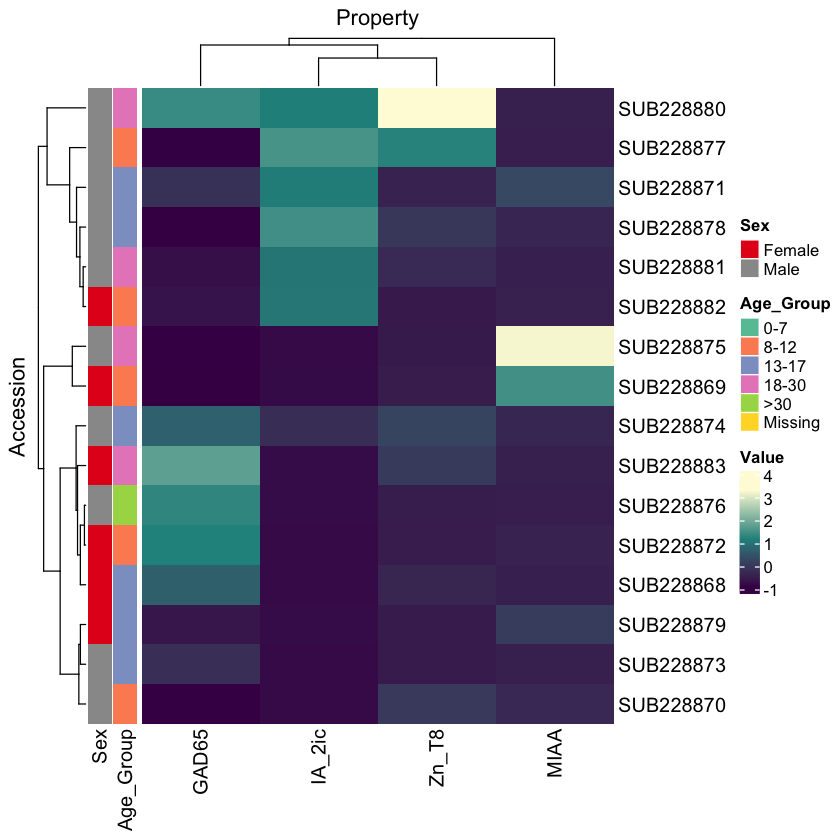

In [39]:
hm_1737_v1$hm_ward

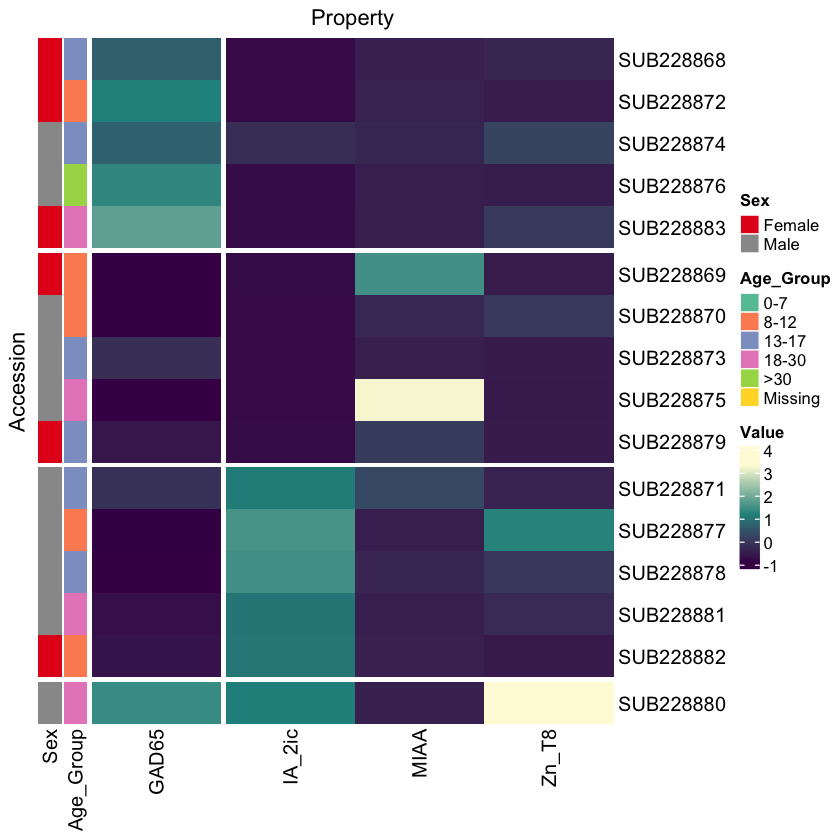

In [40]:
hm_1737_v1$hm_kmeans

**SDY524** - longitudinal data


In [41]:
getwd()

[1] "/Users/adeslatt/Scitechcon Dropbox/Anne DeslattesMays/projects/oadr-autoantibody"

In [42]:
sdy524_antibody <- as.matrix(read.csv("data/SDY524/SDY524_ITN-27AI.DataSet.Auto_Antibody.csv"))

In [43]:
sdy524_antibody.df <- data.frame(sdy524_antibody)

In [44]:
head(sdy524_antibody.df)

,ImmPort.Accession,Participant.ID,Treatment.Group,Intent.To.Treat.Population,Sequence.Num,Barcode,Visit_Num,Ship_Cond,Cond_Tube,AutoAB,Value
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,SUB146759,AbATE_106306,hOKT3,Yes,312.0000,921897H16A,-1,good,good,GAD65,418.000
2,SUB146759,AbATE_106306,hOKT3,Yes,312.0000,921897H16A,-1,good,good,IA_2ic,450.000
3,SUB146759,AbATE_106306,hOKT3,Yes,312.0000,921897H16A,-1,good,good,MIAA,0.015
4,SUB146759,AbATE_106306,hOKT3,Yes,312.0000,921897H16A,-1,good,good,ZNT8,0.180
5,SUB146759,AbATE_106306,hOKT3,Yes,334.0000,931676H01A,21,good,good,GAD65,616.000
6,SUB146759,AbATE_106306,hOKT3,Yes,334.0000,931676H01A,21,good,good,IA_2ic,288.000


In [45]:
sdy524_antibody.df %>%
      group_by(Treatment.Group) %>%
      summarise(count = n()) %>%
      arrange(desc(count))

Treatment.Group,count
<chr>,<int>
hOKT3,612
Controls,268


In [46]:
sdy524_antibody.df %>%
      group_by(Visit_Num) %>%
      summarise(count = n()) %>%
      arrange(desc(count))

Visit_Num,count
<chr>,<int>
-1,300
21,292
42,288


In [47]:
sdy524_subj <- as.matrix(read.csv("data/SDY524/SDY524_ITN027AI.DataSet.ADSTAND.csv",sep=","))

In [48]:
sdy524_subj.df <- data.frame(sdy524_subj)

In [49]:
colnames(sdy524_subj.df)

[1] "ImmPort.Accession"                   "Participant_ID"                     
 [3] "Age_Group"                           "Age_years"                          
 [5] "Completed_Study"                     "Completed_Study_Therapy"            
 [7] "Data_Snapshot_Date"                  "Diagnosis_Date"                     
 [9] "Study_Termination_Reason"            "Date_of_Study_Drug_Disctontinuation"
[11] "Discontinued_Therapy_Reason"         "Enrollment_Date"                    
[13] "Ethnicity"                           "First_Dose_Date"                    
[15] "Date_of_last_follow.up"              "Date_Completed_IS_Withdrawal"       
[17] "Intent_to_Treat"                     "Last_Dose_Date"                     
[19] "Time_off_IS.Drug_Days"               "Race"                               
[21] "Randomized"                          "Date_of_Randomization"              
[23] "Safety_Sample"                       "Group.Stratum"                      
[25] "Sex"                                 "Subject_Status"                     
[27] "Study_Identifier"                    "Date_of_Transplant"                 
[29] "Transplant_Group"                    "Randomized_Treatment_Group"

In [50]:
colnames(sdy524_antibody.df)

[1] "ImmPort.Accession"          "Participant.ID"            
 [3] "Treatment.Group"            "Intent.To.Treat.Population"
 [5] "Sequence.Num"               "Barcode"                   
 [7] "Visit_Num"                  "Ship_Cond"                 
 [9] "Cond_Tube"                  "AutoAB"                    
[11] "Value"

In [51]:
subject_df <- unique(sdy524_subj.df[,c ('ImmPort.Accession',
                                 'Participant_ID',
                                 'Age_Group',
                                 'Age_years',
                                 'Race',
                                 'Sex',
                                 'Ethnicity')])

In [52]:
sdy524_df <- left_join(subject_df, sdy524_antibody.df, by = "ImmPort.Accession")

In [53]:
any(duplicated(names(sdy524_df)))
names(sdy524_df)[duplicated(names(sdy524_df))]

[1] FALSE

character(0)

In [54]:
dim(sdy524_df)

[1] 888  17

In [55]:
head(sdy524_df)

,ImmPort.Accession,Participant_ID,Age_Group,Age_years,Race,Sex,Ethnicity,Participant.ID,Treatment.Group,Intent.To.Treat.Population,Sequence.Num,Barcode,Visit_Num,Ship_Cond,Cond_Tube,AutoAB,Value
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,SUB146759,AbATE_106306,8-12,13.0,American Indian or Alaska Native; White,Female,Not Hispanic or Latino,AbATE_106306,hOKT3,Yes,312.0000,921897H16A,-1,good,good,GAD65,418.000
2,SUB146759,AbATE_106306,8-12,13.0,American Indian or Alaska Native; White,Female,Not Hispanic or Latino,AbATE_106306,hOKT3,Yes,312.0000,921897H16A,-1,good,good,IA_2ic,450.000
3,SUB146759,AbATE_106306,8-12,13.0,American Indian or Alaska Native; White,Female,Not Hispanic or Latino,AbATE_106306,hOKT3,Yes,312.0000,921897H16A,-1,good,good,MIAA,0.015
4,SUB146759,AbATE_106306,8-12,13.0,American Indian or Alaska Native; White,Female,Not Hispanic or Latino,AbATE_106306,hOKT3,Yes,312.0000,921897H16A,-1,good,good,ZNT8,0.180
5,SUB146759,AbATE_106306,8-12,13.0,American Indian or Alaska Native; White,Female,Not Hispanic or Latino,AbATE_106306,hOKT3,Yes,334.0000,931676H01A,21,good,good,GAD65,616.000
6,SUB146759,AbATE_106306,8-12,13.0,American Indian or Alaska Native; White,Female,Not Hispanic or Latino,AbATE_106306,hOKT3,Yes,334.0000,931676H01A,21,good,good,IA_2ic,288.000


In [56]:
sdy524_df %>%
      group_by(Age_Group) %>%
      summarise(count = n()) %>%
      arrange(desc(count))

Age_Group,count
<chr>,<int>
8-12,558
13-17,269
18-30,61


In [57]:
sdy524_df %>%
      group_by(Visit_Num) %>%
      summarise(count = n()) %>%
      arrange(desc(count))

Visit_Num,count
<chr>,<int>
-1,300
21,292
42,288
NA,8


In [58]:
## baseline (-1)
tidy_524_v_m1 <- aa_prepare(
  sdy524_df,
  accession_col     = "ImmPort.Accession",
  sex_col           = "Sex",
  age_group_col     = "Age_Group",
  age_years_col     = "Age_years",
  analyte_name_col  = "AutoAB",
  analyte_value_col = "Value",
  visit_cols        = c("Visit_Num","Visitnum","Visit"),
  restrict_visits   = -1
)
hm_524_v_m1 <- aa_heatmaps(tidy_524_v_m1, scale_mode = "column", k_rows = 4, k_cols = 2)

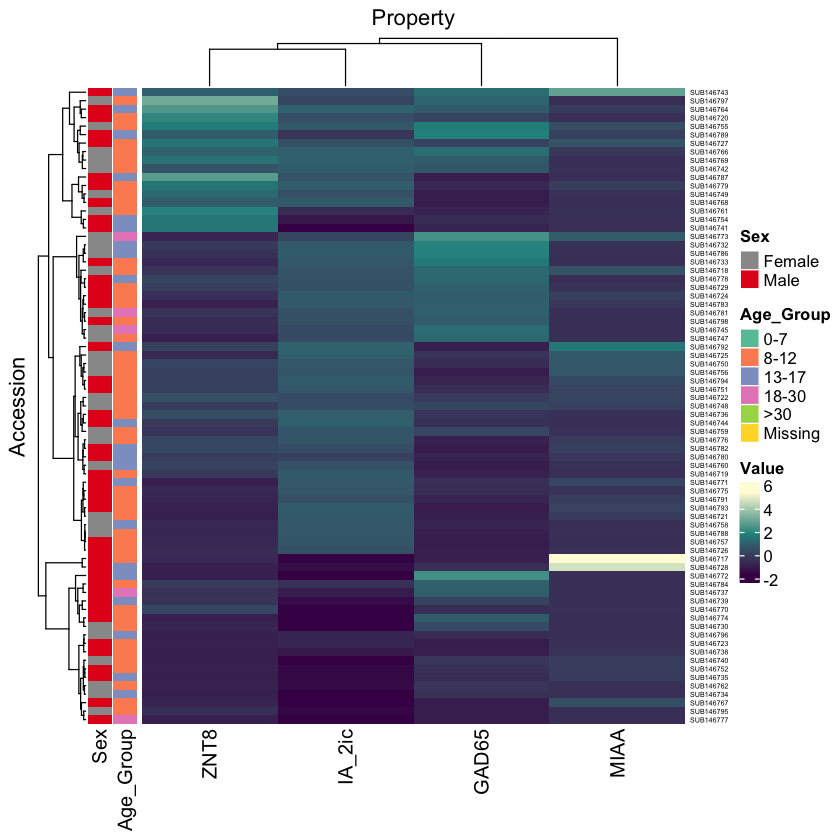

In [59]:
hm_524_v_m1$hm_ward

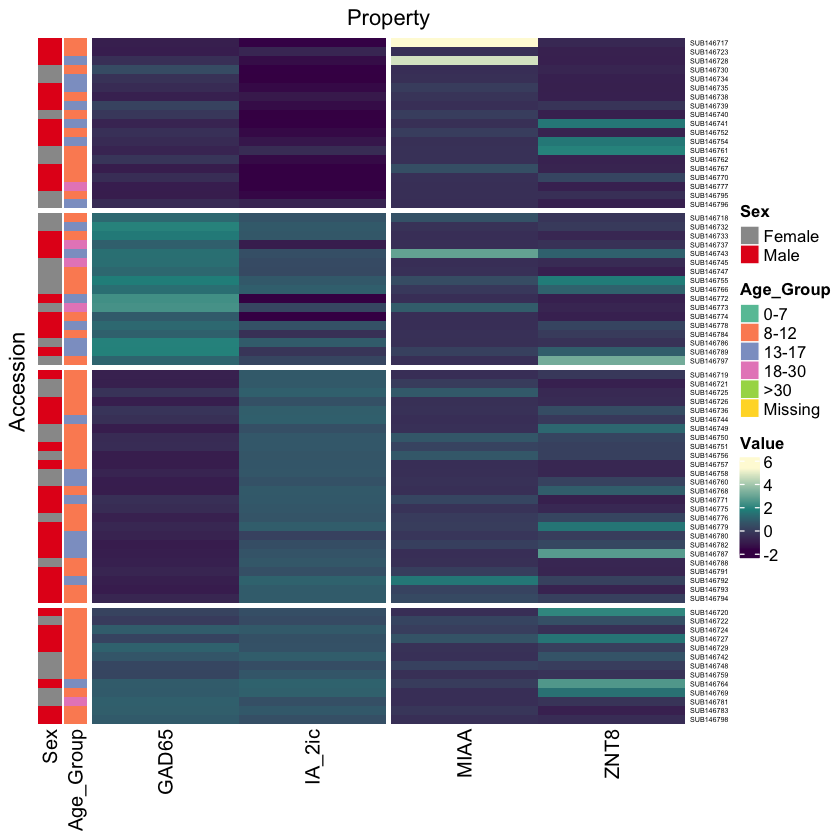

In [60]:
hm_524_v_m1$hm_kmeans

In [61]:
## day 21
tidy_524_v21 <- aa_prepare(
  sdy524_df,
  accession_col     = "ImmPort.Accession",
  sex_col           = "Sex",
  age_group_col     = "Age_Group",
  age_years_col     = "Age_years",
  analyte_name_col  = "AutoAB",
  analyte_value_col = "Value",
  visit_cols        = c("Visit_Num","Visitnum","Visit"),
  restrict_visits   = 21
)
hm_524_v21 <- aa_heatmaps(tidy_524_v21, scale_mode = "column", k_rows = 4, k_cols = 2)

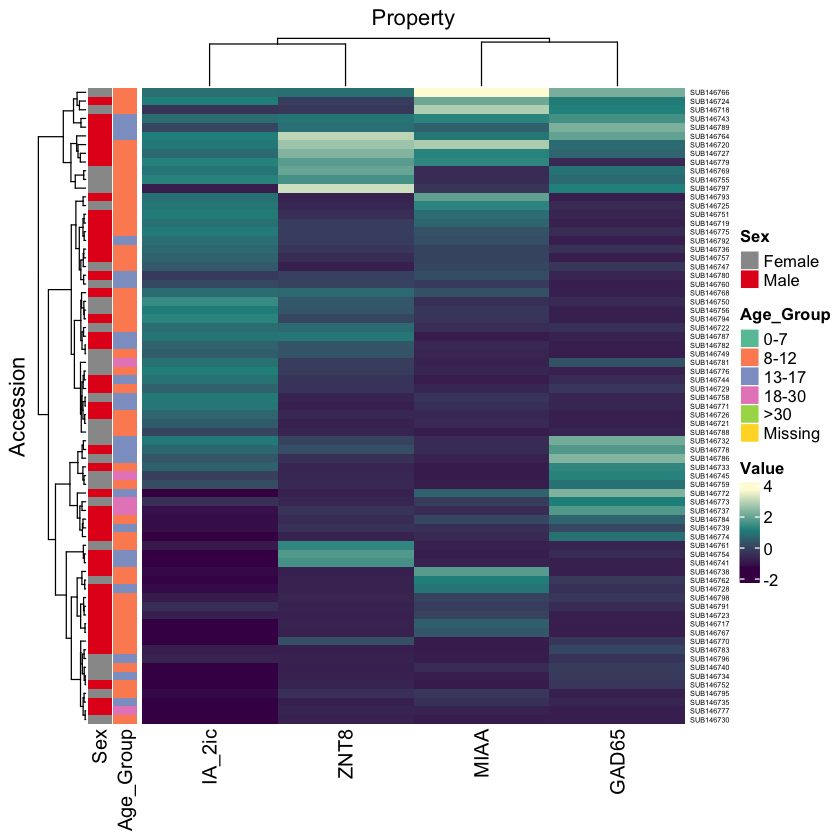

In [62]:
hm_524_v21$hm_ward

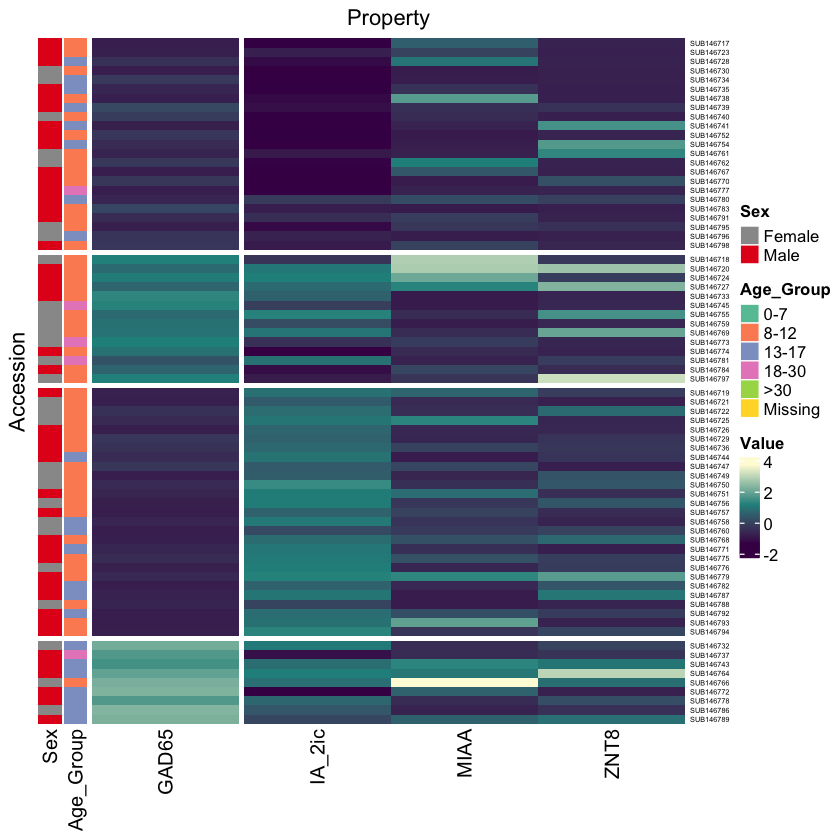

In [63]:
hm_524_v21$hm_kmeans

In [64]:
## day 42
tidy_524_v42 <- aa_prepare(
  sdy524_df,
  accession_col     = "ImmPort.Accession",
  sex_col           = "Sex",
  age_group_col     = "Age_Group",
  age_years_col     = "Age_years",
  analyte_name_col  = "AutoAB",
  analyte_value_col = "Value",
  visit_cols        = c("Visit_Num","Visitnum","Visit"),
  restrict_visits   = 42
)
hm_524_v42 <- aa_heatmaps(tidy_524_v42, scale_mode = "column", k_rows = 4, k_cols = 2)

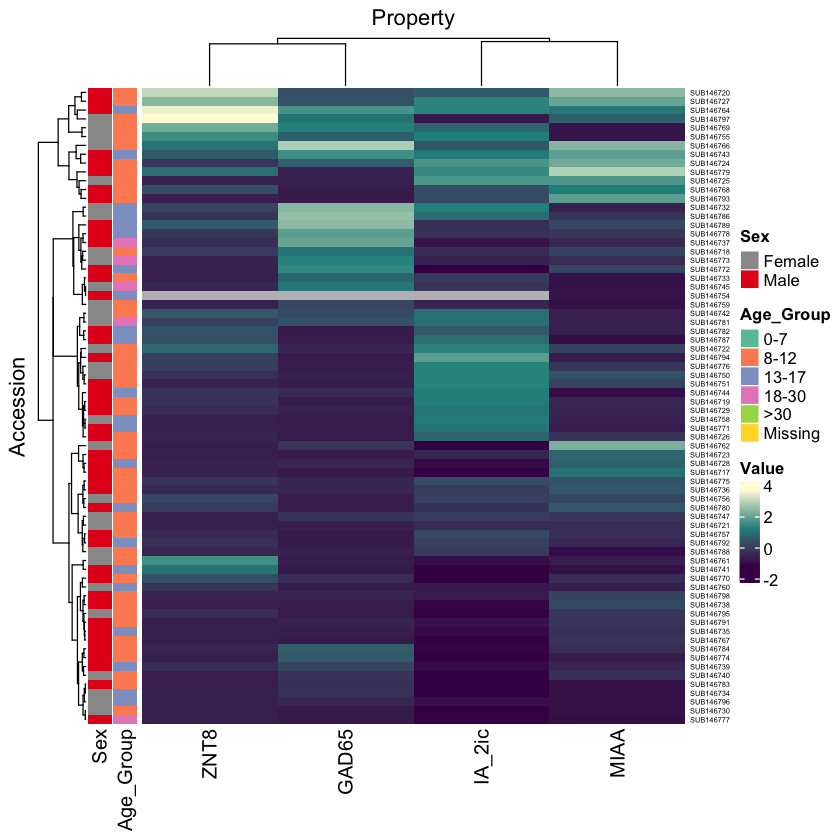

In [65]:
hm_524_v42$hm_ward

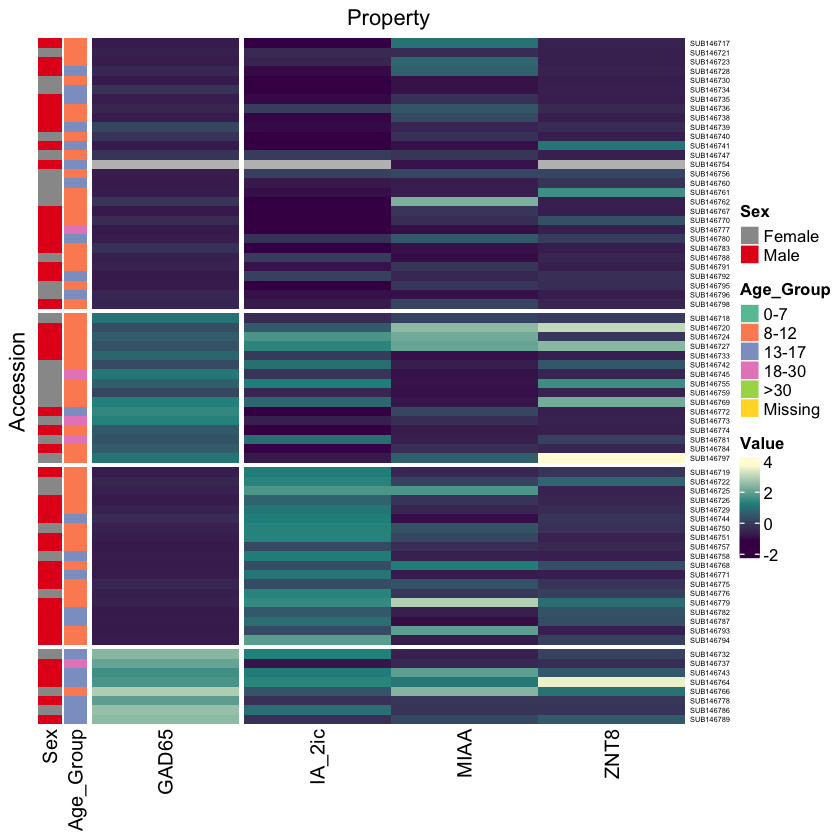

In [66]:
hm_524_v42$hm_kmeans

**ImmPort SDY569**

In [67]:
getwd()

[1] "/Users/adeslatt/Scitechcon Dropbox/Anne DeslattesMays/projects/oadr-autoantibody"

In [68]:
sdy569_antibody <- as.matrix(read.csv("data/SDY569/aa_569.csv",sep=","))
sdy569_antibody.df <- data.frame(sdy569_antibody)
head(sdy569_antibody.df)

,accession,gad65,miaa,ia_2ic,baseline_height_cm,baseline_weight_kg,baseline_bmi_kg_m_2,numeric_date_drawn
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,SUB151307,0.040,2.08,0.71,153.0,43.0,18.4,6-6-2002
2,SUB151308,0.430,0.01,0.00,180.0,78.9,24.4,7-29-2001
3,SUB151309,0.343,0.05,0.26,121.8,26.6,17.9,12-29-2001
4,SUB151310,0.109,0.02,-0.01,145.0,40.0,19.0,4-20-2002
5,SUB151312,1.090,-0.01,0.00,179.0,91.8,28.7,3-11-2002
6,SUB151313,0.330,0.21,0.54,172.0,71.1,24.0,11-29-2001


In [69]:
sdy569_subj <- as.matrix(read.csv("data/SDY569/demo_569.csv",sep=","))
sdy569_subj.df <- data.frame(sdy569_subj)
head(sdy569_subj.df)

,accession,participant_id,study_id,sex,year_of_birth,cohort_group,race,ethnicity,condition,date_of_t1dm_diagnosis,day_0_date
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,SUB151307,ITN007AI_195962,NDB01,Female,1992,2,White,Not Hispanic or Latino,Type 1 Diabetes,2002-06-21,2002-06-21
2,SUB151308,ITN007AI_260733,NDB01,Male,1977,2,White,Not Hispanic or Latino,Type 1 Diabetes,2001-07-29,2001-07-29
3,SUB151309,ITN007AI_303504,NDB01,Male,1991,1,White,Not Hispanic or Latino,Type 1 Diabetes,2001-12-29,2001-12-29
4,SUB151310,ITN007AI_354273,NDB01,Male,1992,2,White,Not Hispanic or Latino,Type 1 Diabetes,2002-04-20,2002-04-20
5,SUB151312,ITN007AI_415808,NDB01,Male,1987,2,White,Not Hispanic or Latino,Type 1 Diabetes,2002-03-27,2002-03-27
6,SUB151313,ITN007AI_417544,NDB01,Male,1977,2,White,Not Hispanic or Latino,Type 1 Diabetes,2001-12-16,2001-12-16


In [70]:
subject_df <- unique(sdy569_subj.df[, c(
  "accession",
  "study_id",
  "sex",
  "year_of_birth",
  "cohort_group",
  "race",
  "ethnicity",
  "day_0_date",
  "date_of_t1dm_diagnosis"
)])


In [71]:
install.packages("tidyverse")
install.packages("lubridate")
library("tidyverse")
library("lubridate")

Installing package into ‘/Users/adeslatt/Library/R/arm64/4.5/library’
(as ‘lib’ is unspecified)




The downloaded binary packages are in
	/var/folders/f4/f7f3s6113490h0n3lsrlqyqh0000gn/T//RtmpEzPz1s/downloaded_packages


Installing package into ‘/Users/adeslatt/Library/R/arm64/4.5/library’
(as ‘lib’ is unspecified)




The downloaded binary packages are in
	/var/folders/f4/f7f3s6113490h0n3lsrlqyqh0000gn/T//RtmpEzPz1s/downloaded_packages


── Attaching core tidyverse packages ────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ purrr     1.1.0
✔ ggplot2   3.5.2     ✔ readr     2.1.5
✔ lubridate 1.9.4     ✔ stringr   1.5.2
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [72]:
sdy569_subj.df <- subject_df %>%
  mutate(
    day_0_date = as.Date(day_0_date),
    age_years = year(day_0_date) - as.numeric(year_of_birth),
    visit = -1,
    age_group = aa_age_to_group(age_years)
  )

In [73]:
# ---- Ensure antibody dataframe has Accession for join
sdy569_antibody.df$accession <- as.character(sdy569_antibody.df$accession)

In [74]:
# ---- Left join subject + antibody data
sdy569_df <- left_join(sdy569_subj.df, sdy569_antibody.df, by = "accession")

In [75]:
colnames(sdy569_df)

[1] "accession"              "study_id"               "sex"                   
 [4] "year_of_birth"          "cohort_group"           "race"                  
 [7] "ethnicity"              "day_0_date"             "date_of_t1dm_diagnosis"
[10] "age_years"              "visit"                  "age_group"             
[13] "gad65"                  "miaa"                   "ia_2ic"                
[16] "baseline_height_cm"     "baseline_weight_kg"     "baseline_bmi_kg_m_2"   
[19] "numeric_date_drawn"

In [76]:
# ---- rename to match expectations for aa_prepare
sdy569_df <- sdy569_df %>%
  rename(
    Accession = accession,
    Sex = sex,
    Age_years = age_years,
    Age_Group = age_group,
    Visit = visit,
    Baseline_Height_cm = baseline_height_cm,
    Baseline_Weight_kg = baseline_weight_kg,
    Baseline_BMI_kg_m2 = baseline_bmi_kg_m_2
  )


In [77]:
tidy_569 <- aa_prepare(
  sdy569_df,
  accession_col   = "Accession",
  sex_col         = "Sex",
  age_years_col   = "Age_years",
  age_group_col   = "Age_Group",
  analyte_cols    = c("gad65", "ia_2ic", "miaa"),  # adjust if different
  visit_cols      = c("visit"),
  restrict_visits = -1  # Or remove if not relevant
)

In [78]:
hm_569 <- aa_heatmaps(
  tidy_569,
  scale_mode = "column",
  k_rows = 4,
  k_cols = 2
)

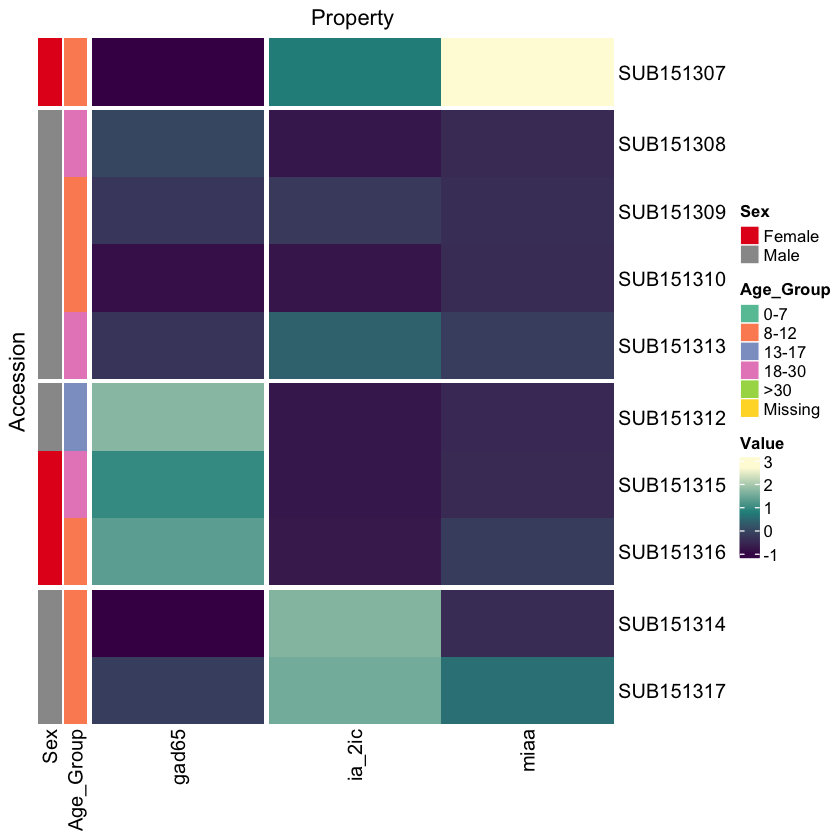

In [79]:
# View plots
hm_569$hm_kmeans

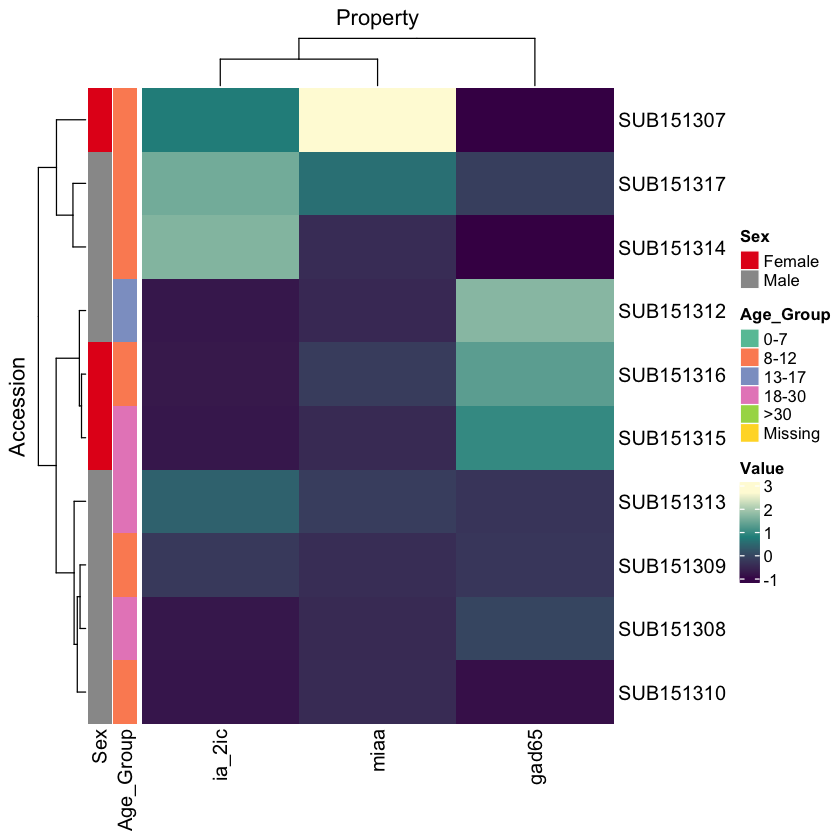

In [80]:
hm_569$hm_ward

**ImmPort SDY1625**

In [146]:
# Load antibody results (already done earlier)
getwd()

[1] "/Users/adeslatt/Scitechcon Dropbox/Anne DeslattesMays/projects/oadr-autoantibody"

In [82]:
# Load demographics
sdy1625_demo <- as.matrix(read.csv("data/SDY1625/SDY1625_demo.csv",sep=","))
sdy1625_demo.df <- data.frame (sdy1625_demo)
colnames(sdy1625_demo.df)

[1] "ageEvent"                 "ageEventSpecify"         
 [3] "ageUnit"                  "ancestral_population"    
 [5] "armAccession"             "armDescription"          
 [7] "armName"                  "armTypePreferred"        
 [9] "armTypeReported"          "briefTitle"              
[11] "ethnicity"                "gender"                  
[13] "maxSubjectAge"            "max_subject_age_in_years"
[15] "minSubjectAge"            "min_subject_age_in_years"
[17] "race"                     "raceSpecify"             
[19] "species"                  "strain"                  
[21] "strain_characteristics"   "studyAccession"          
[23] "subjectAccession"         "subjectDescription"      
[25] "subjectLocation"          "subjectPhenotype"

In [83]:
# Load autoantibody results
sdy1625_ab <- as.matrix(read.csv("data/SDY1625/SDY1625_elisa_result.csv",sep=","))
sdy1625_ab.df <- data.frame(sdy1625_ab)
head(sdy1625_ab.df)

,RESULT_ID,ANALYTE_ACCESSION,ANALYTE_PREFERRED,ANALYTE_REPORTED,ARM_ACCESSION,BIOSAMPLE_ACCESSION,COMMENTS,EXPERIMENT_ACCESSION,EXPSAMPLE_ACCESSION,REPOSITORY_ACCESSION,REPOSITORY_NAME,STUDY_ACCESSION,STUDY_TIME_COLLECTED,STUDY_TIME_COLLECTED_UNIT,SUBJECT_ACCESSION,UNIT_PREFERRED,UNIT_REPORTED,VALUE_PREFERRED,VALUE_REPORTED,WORKSPACE_ID
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,370545,NA,NA,GAD Autoantibody,ARM5236,BS1055967,NA,EXP29875,ES1294838,NA,NA,SDY1625,1,Days,SUB209143,IU/ml,IU/ml,68.877,68.877,6489
2,370546,NA,NA,IA-2 Autoantibody,ARM5236,BS1055967,NA,EXP29875,ES1294838,NA,NA,SDY1625,1,Days,SUB209143,IU/ml,IU/ml,4000.000,4000.000,6489
3,370547,NA,NA,ZnT8 Autoantibody,ARM5236,BS1055967,NA,EXP29875,ES1294838,NA,NA,SDY1625,1,Days,SUB209143,IU/ml,IU/ml,941.802,941.802,6489
4,370548,NA,NA,GAD Autoantibody,ARM5236,BS1055968,NA,EXP29875,ES1294839,NA,NA,SDY1625,1,Days,SUB209144,IU/ml,IU/ml,87.406,87.406,6489
5,370549,NA,NA,IA-2 Autoantibody,ARM5236,BS1055968,NA: below detection,EXP29875,ES1294839,NA,NA,SDY1625,1,Days,SUB209144,IU/ml,IU/ml,NA,NA,6489
6,370550,NA,NA,ZnT8 Autoantibody,ARM5236,BS1055968,NA,EXP29875,ES1294839,NA,NA,SDY1625,1,Days,SUB209144,IU/ml,IU/ml,270.623,270.623,6489


In [84]:
library(dplyr)
library(lubridate)

# Clean demographic information
sdy1625_demo.df <- sdy1625_demo.df %>%
  mutate(
    Accession = as.character(subjectAccession),
    Age_years = maxSubjectAge,
    Age_Group = aa_age_to_group(maxSubjectAge),
    Sex = as.character(gender),
    Visit = -1
  )


In [85]:
# Clean elisa information
sdy1625_ab.df <- sdy1625_ab.df %>%
  mutate(
    Accession = as.character(SUBJECT_ACCESSION),
    Property = trimws(ANALYTE_REPORTED),
    Value_raw = trimws(VALUE_REPORTED),
    Value = suppressWarnings(as.numeric(Value_raw))
  )


In [86]:
sdy1625_df <- left_join(sdy1625_ab.df, sdy1625_demo.df, by = "Accession")

In [87]:
tidy_1625 <- aa_prepare(
  df                = sdy1625_df,
  accession_col     = "Accession",
  sex_col           = "Sex",
  age_years_col     = "Age_years",
  age_group_col     = "Age_Group",      # optional if age_years_col is given
  analyte_name_col  = "Property",       # from ELISA data
  analyte_value_col = "Value",          # from ELISA data
  visit_cols        = c("Visit"),
  restrict_visits   = -1
)


In [88]:
# new function for renaming
ab_name_map <- c(
  "GAD Autoantibody"           = "GAD65",
  "IA-2 Autoantibody"          = "IA_2ic",
  "ZnT8 Autoantibody"          = "Zn_T8",
  "MIAA Autoantibody"          = "MIAA",
  "IA2ic"                      = "IA_2ic",  # in case of naming drift
  "ZNT8A"                      = "Zn_T8",   # ImmPort sometimes uses this
  "GADA"                       = "GAD65",
  "MIAA"                       = "MIAA"
)


In [89]:
tidy_1625 <- tidy_1625 %>%
  mutate(Property = recode(Property, !!!ab_name_map))


In [90]:
sum(is.nan(tidy_1625$Value))  # How many NaNs?

[1] 40

In [91]:
tidy_1625 <- tidy_1625 %>%
  mutate(Value = ifelse(is.nan(Value), NA, Value))


In [92]:
summary(tidy_1625$Value)
sum(is.na(tidy_1625$Value))
sum(is.nan(tidy_1625$Value))
sum(is.infinite(tidy_1625$Value))


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
   0.828   10.212   79.074  398.945  350.849 4000.000       40 

[1] 40

[1] 0

[1] 0

In [93]:
tidy_1625 <- tidy_1625 %>%
  mutate(Value = ifelse(is.na(Value), 0, as.numeric(Value)))


In [94]:
hm_1625 <- aa_heatmaps(tidy_1625, 
                       scale_mode = "column", 
                       k_rows = 4, 
                       k_cols = 2)


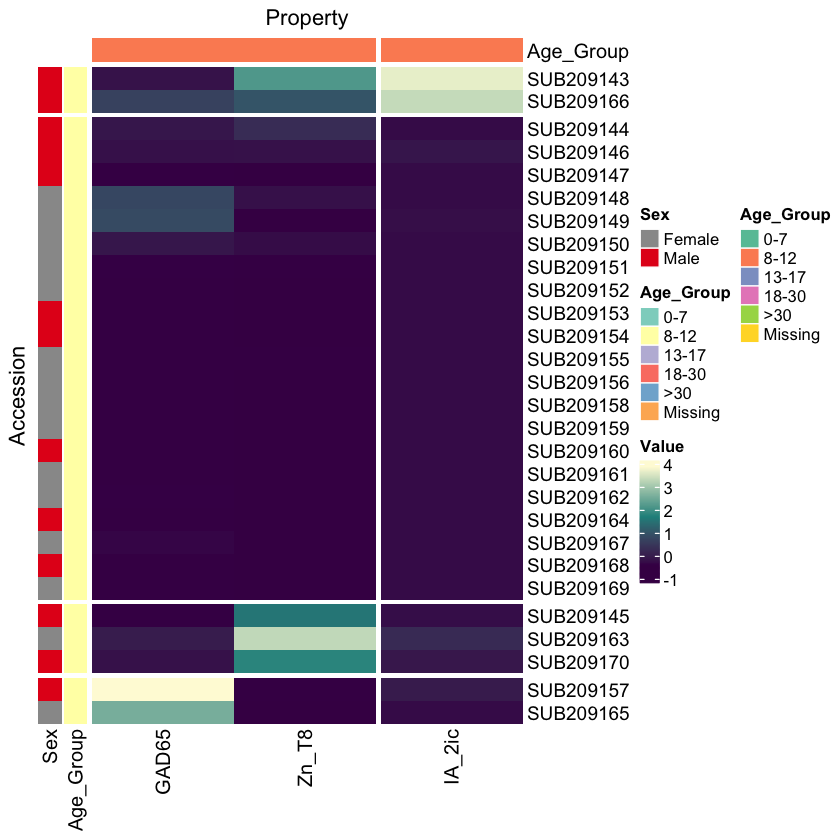

In [95]:
hm_1625$hm_kmeans

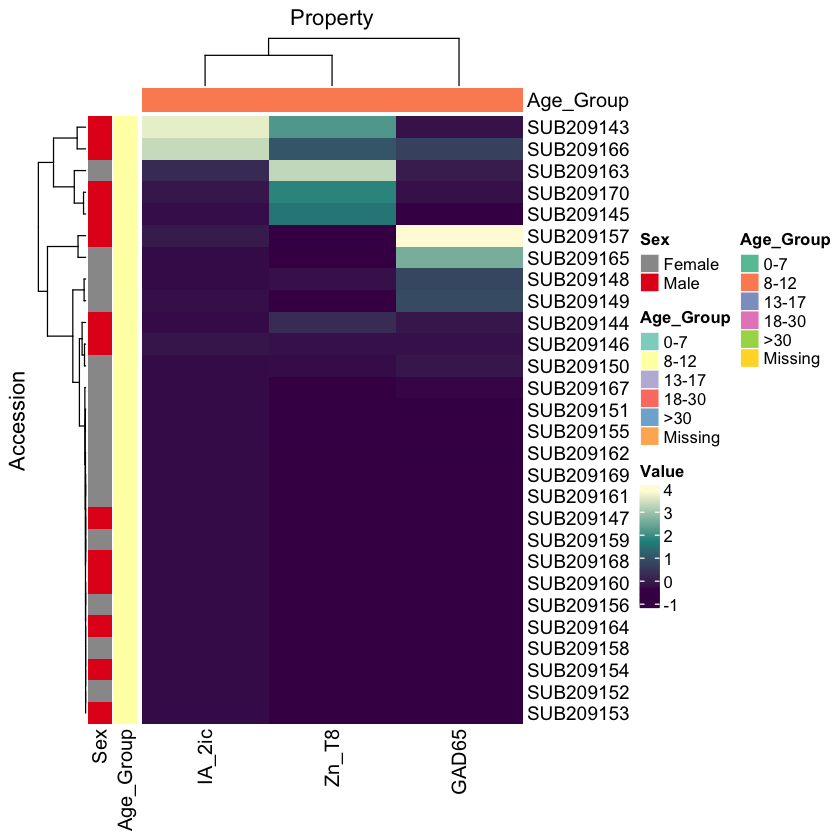

In [96]:

# Show plots
hm_1625$hm_ward


**ImmPort SDY797**

In [151]:
# Load demographics
getwd()
sdy797_demo <- as.matrix(read.csv("data/SDY797/SDY797_demo.csv",sep=","))
sdy797_demo.df <- data.frame (sdy797_demo)
colnames(sdy797_demo.df)
head(sdy797_demo.df)

[1] "/Users/adeslatt/Scitechcon Dropbox/Anne DeslattesMays/projects/oadr-autoantibody"

[1] "ethnicity"                "gender"                  
 [3] "maxSubjectAge"            "max_subject_age_in_years"
 [5] "minSubjectAge"            "min_subject_age_in_years"
 [7] "race"                     "raceSpecify"             
 [9] "species"                  "strain"                  
[11] "strain_characteristics"   "studyAccession"          
[13] "subjectAccession"         "subjectDescription"      
[15] "subjectLocation"          "subjectPhenotype"

,ethnicity,gender,maxSubjectAge,max_subject_age_in_years,minSubjectAge,min_subject_age_in_years,race,raceSpecify,species,strain,strain_characteristics,studyAccession,subjectAccession,subjectDescription,subjectLocation,subjectPhenotype
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Not Hispanic or Latino,Male,23,23,23,23,White,NA,Homo sapiens,NA,NA,SDY797,SUB168890,NA,NA,NA
2,Not Hispanic or Latino,Female,14,14,14,14,White,NA,Homo sapiens,NA,NA,SDY797,SUB168891,NA,NA,NA
3,Not Hispanic or Latino,Male,19,19,19,19,White,NA,Homo sapiens,NA,NA,SDY797,SUB168892,NA,NA,NA
4,Not Hispanic or Latino,Female,13,13,13,13,White,NA,Homo sapiens,NA,NA,SDY797,SUB168893,NA,NA,NA
5,Not Hispanic or Latino,Male,19,19,19,19,White,NA,Homo sapiens,NA,NA,SDY797,SUB168894,NA,NA,NA
6,Not Hispanic or Latino,Male,16,16,16,16,White,NA,Homo sapiens,NA,NA,SDY797,SUB168895,NA,NA,NA


In [153]:
# Load autoantibody results
sdy797_aa <- as.matrix(read.csv("data/SDY797/sdy797_aa.csv",sep=","))
sdy797_aa.df <- data.frame(sdy797_aa)
colnames(sdy797_aa.df)
head(sdy797_aa.df)

[1] "participantId"                       "ImmPort_Accession"                  
 [3] "Visit"                               "visitnum"                           
 [5] "GAD_65_Result_less_than20_Negative"  "IA.2ic_Result_less_than5_Negative"  
 [7] "MIAA_Result_less_than0.010_Negative" "ZnT8_Result_less_than0.030_Negative"
 [9] "ICA_Result_less_than10_Negative"     "Treatment_Group"

,participantId,ImmPort_Accession,Visit,visitnum,GAD_65_Result_less_than20_Negative,IA.2ic_Result_less_than5_Negative,MIAA_Result_less_than0.010_Negative,ZnT8_Result_less_than0.030_Negative,ICA_Result_less_than10_Negative,Treatment_Group
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,T1DAL_137962,SUB168890,-1,-1,Positive,Negative,Positive,Positive,Positive,Placebo
2,T1DAL_142037,SUB168891,-1,-1,Positive,Negative,Positive,Negative,Positive,Placebo
3,T1DAL_161919,SUB168892,-1,-1,Positive,Positive,Positive,Positive,Positive,Placebo
4,T1DAL_185333,SUB168893,-1,-1,Positive,Positive,Negative,Positive,Negative,Placebo
5,T1DAL_243767,SUB168894,-1,-1,Positive,Positive,Negative,Positive,Positive,Alefacept
6,T1DAL_267590,SUB168895,-1,-1,Positive,Positive,Negative,Negative,,Placebo


In [158]:
library(dplyr)
library(tidyr)
library(stringr)

# Your raw input
df <- sdy797_aa.df

# 1. Select antibody columns and rename to Property-friendly names
sdy797_aa_clean.df <- df %>%
  rename(Accession = ImmPort_Accession) %>%
  mutate(Study = "SDY797") %>%
  select(
    Accession,
    GAD_65_Result_less_than20_Negative,
    IA.2ic_Result_less_than5_Negative,
    MIAA_Result_less_than0.010_Negative,
    ZnT8_Result_less_than0.030_Negative,
    ICA_Result_less_than10_Negative,
    Study
  ) %>%
  pivot_longer(
    cols = -c(Accession, Study),
    names_to = "Property",
    values_to = "Value"
  ) %>%
  mutate(
    # Convert "Positive"/"Negative" to 1/0
    Value = case_when(
      tolower(Value) == "positive" ~ 1,
      tolower(Value) == "negative" ~ 0,
      TRUE ~ NA_real_
    ),
    # Harmonize property names
    Property = case_when(
      str_detect(Property, "GAD") ~ "GAD65",
      str_detect(Property, "IA.2ic") ~ "IA_2ic",
      str_detect(Property, "MIAA") ~ "MIAA",
      str_detect(Property, "ZnT8") ~ "Zn_T8",
      str_detect(Property, "ICA") ~ "ICA",
      TRUE ~ Property
    )
  ) %>%
  select(Accession, Property, Value, Study)

# Preview
print(head(sdy797_aa_clean.df, 10))


# A tibble: 10 × 4
   Accession Property Value Study 
   <chr>     <chr>    <dbl> <chr> 
 1 SUB168890 GAD65        1 SDY797
 2 SUB168890 IA_2ic       0 SDY797
 3 SUB168890 MIAA         1 SDY797
 4 SUB168890 Zn_T8        1 SDY797
 5 SUB168890 ICA          1 SDY797
 6 SUB168891 GAD65        1 SDY797
 7 SUB168891 IA_2ic       0 SDY797
 8 SUB168891 MIAA         1 SDY797
 9 SUB168891 Zn_T8        0 SDY797
10 SUB168891 ICA          1 SDY797


In [157]:
library(dplyr)
library(lubridate)

# Clean demographic information
sdy797_demo.df <- sdy797_demo.df %>%
  mutate(
    Accession = as.character(subjectAccession),
    Age_years = maxSubjectAge,
    Age_Group = aa_age_to_group(maxSubjectAge),
    Sex = as.character(gender),
    Visit = -1,
    Study = as.character(studyAccession)
  )
head(sdy797_demo.df)

,ethnicity,gender,maxSubjectAge,max_subject_age_in_years,minSubjectAge,min_subject_age_in_years,race,raceSpecify,species,strain,⋯,subjectAccession,subjectDescription,subjectLocation,subjectPhenotype,Accession,Age_years,Age_Group,Sex,Visit,Study
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>,<chr>,<dbl>,<chr>
1,Not Hispanic or Latino,Male,23,23,23,23,White,NA,Homo sapiens,NA,⋯,SUB168890,NA,NA,NA,SUB168890,23,8-12,Male,-1,SDY797
2,Not Hispanic or Latino,Female,14,14,14,14,White,NA,Homo sapiens,NA,⋯,SUB168891,NA,NA,NA,SUB168891,14,8-12,Female,-1,SDY797
3,Not Hispanic or Latino,Male,19,19,19,19,White,NA,Homo sapiens,NA,⋯,SUB168892,NA,NA,NA,SUB168892,19,8-12,Male,-1,SDY797
4,Not Hispanic or Latino,Female,13,13,13,13,White,NA,Homo sapiens,NA,⋯,SUB168893,NA,NA,NA,SUB168893,13,8-12,Female,-1,SDY797
5,Not Hispanic or Latino,Male,19,19,19,19,White,NA,Homo sapiens,NA,⋯,SUB168894,NA,NA,NA,SUB168894,19,8-12,Male,-1,SDY797
6,Not Hispanic or Latino,Male,16,16,16,16,White,NA,Homo sapiens,NA,⋯,SUB168895,NA,NA,NA,SUB168895,16,8-12,Male,-1,SDY797


In [163]:
sdy797_df <- left_join(sdy797_aa_clean.df, sdy797_demo.df, by = "Accession")

In [164]:
head(sdy797_df)

Accession,Property,Value,Study.x,ethnicity,gender,maxSubjectAge,max_subject_age_in_years,minSubjectAge,min_subject_age_in_years,⋯,studyAccession,subjectAccession,subjectDescription,subjectLocation,subjectPhenotype,Age_years,Age_Group,Sex,Visit,Study.y
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>,<chr>,<dbl>,<chr>
SUB168890,GAD65,1,SDY797,Not Hispanic or Latino,Male,23,23,23,23,⋯,SDY797,SUB168890,NA,NA,NA,23,8-12,Male,-1,SDY797
SUB168890,IA_2ic,0,SDY797,Not Hispanic or Latino,Male,23,23,23,23,⋯,SDY797,SUB168890,NA,NA,NA,23,8-12,Male,-1,SDY797
SUB168890,MIAA,1,SDY797,Not Hispanic or Latino,Male,23,23,23,23,⋯,SDY797,SUB168890,NA,NA,NA,23,8-12,Male,-1,SDY797
SUB168890,Zn_T8,1,SDY797,Not Hispanic or Latino,Male,23,23,23,23,⋯,SDY797,SUB168890,NA,NA,NA,23,8-12,Male,-1,SDY797
SUB168890,ICA,1,SDY797,Not Hispanic or Latino,Male,23,23,23,23,⋯,SDY797,SUB168890,NA,NA,NA,23,8-12,Male,-1,SDY797
SUB168891,GAD65,1,SDY797,Not Hispanic or Latino,Female,14,14,14,14,⋯,SDY797,SUB168891,NA,NA,NA,14,8-12,Female,-1,SDY797


In [165]:
tidy_797 <- aa_prepare(
  df                = sdy797_df,
  accession_col     = "Accession",
  sex_col           = "Sex",
  age_years_col     = "Age_years",
  age_group_col     = "Age_Group",
  analyte_name_col  = "Property",
  analyte_value_col = "Value",
  visit_cols        = c("Visit"),
  restrict_visits   = -1
)


In [195]:
hm_797 <- aa_heatmaps(tidy_797, 
                       scale_mode = "column", 
                       k_rows = 4, 
                       k_cols = 2)


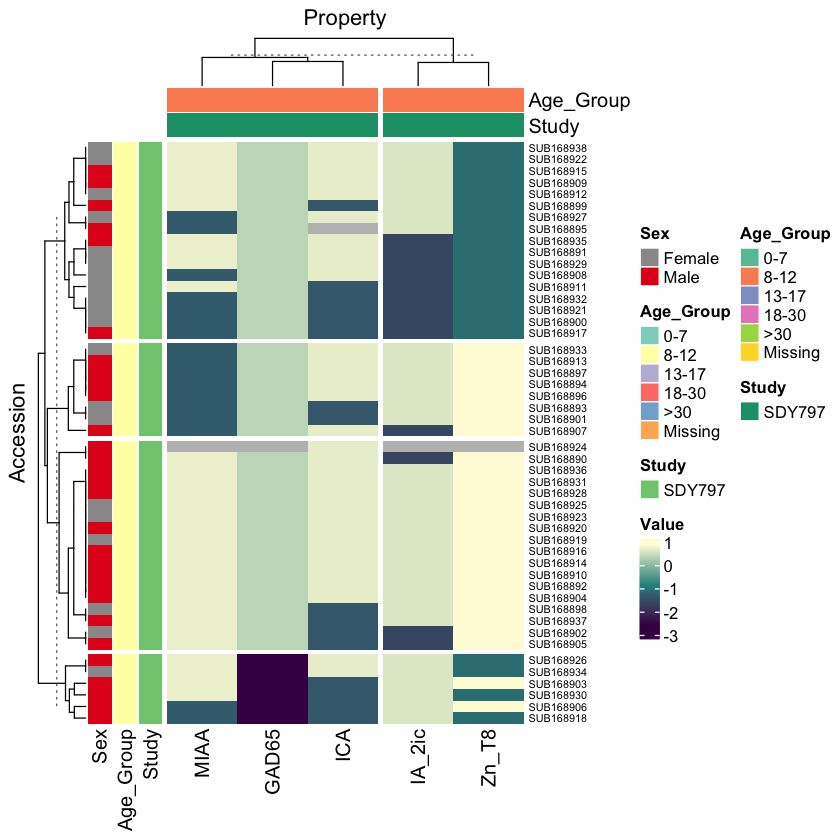

In [196]:
hm_797$hm_kmeans

In [ ]:
hm_797$hm_ward

In [166]:
head(tidy_797)

Accession,Sex,Age_Group,Property,Value
<chr>,<chr>,<fct>,<chr>,<dbl>
SUB168890,Male,8-12,GAD65,1
SUB168890,Male,8-12,IA_2ic,0
SUB168890,Male,8-12,ICA,1
SUB168890,Male,8-12,MIAA,1
SUB168890,Male,8-12,Zn_T8,1
SUB168891,Female,8-12,GAD65,1


In [167]:
colnames(tidy_797)
colnames(tidy_524_v_m1)
colnames(tidy_1737_v1)
colnames(tidy_569)
colnames(tidy_1625)

[1] "Accession" "Sex"       "Age_Group" "Property"  "Value"

[1] "Accession" "Sex"       "Age_Group" "Property"  "Value"

[1] "Accession" "Sex"       "Age_Group" "Property"  "Value"

[1] "Accession" "Sex"       "Age_Group" "Property"  "Value"     "Study"

[1] "Accession" "Sex"       "Age_Group" "Property"  "Value"     "Study"

In [168]:
tidy_797  <- tidy_797 %>% mutate(Study="SDY797")
tidy_1737 <- tidy_1737_v1 %>% mutate(Study = "SDY1737")
tidy_524  <- tidy_524_v_m1  %>% mutate(Study = "SDY524")
tidy_569  <- tidy_569  %>% mutate(Study = "SDY569")
tidy_1625 <- tidy_1625 %>% mutate(Study = "SDY1625")


In [169]:
head(tidy_797)
head(tidy_1737)
head(tidy_524)
head(tidy_569)
head(tidy_1625)

Accession,Sex,Age_Group,Property,Value,Study
<chr>,<chr>,<fct>,<chr>,<dbl>,<chr>
SUB168890,Male,8-12,GAD65,1,SDY797
SUB168890,Male,8-12,IA_2ic,0,SDY797
SUB168890,Male,8-12,ICA,1,SDY797
SUB168890,Male,8-12,MIAA,1,SDY797
SUB168890,Male,8-12,Zn_T8,1,SDY797
SUB168891,Female,8-12,GAD65,1,SDY797


Accession,Sex,Age_Group,Property,Value,Study
<chr>,<chr>,<fct>,<chr>,<dbl>,<chr>
SUB228868,Female,13-17,GAD65,396.000,SDY1737
SUB228868,Female,13-17,IA_2ic,0.000,SDY1737
SUB228868,Female,13-17,MIAA,0.013,SDY1737
SUB228868,Female,13-17,Zn_T8,0.058,SDY1737
SUB228869,Female,8-12,GAD65,3.000,SDY1737
SUB228869,Female,8-12,IA_2ic,1.000,SDY1737


Accession,Sex,Age_Group,Property,Value,Study
<chr>,<chr>,<fct>,<chr>,<dbl>,<chr>
SUB146717,Male,8-12,GAD65,24.000,SDY524
SUB146717,Male,8-12,IA_2ic,36.000,SDY524
SUB146717,Male,8-12,MIAA,1.589,SDY524
SUB146717,Male,8-12,ZNT8,0.073,SDY524
SUB146718,Female,8-12,GAD65,755.000,SDY524
SUB146718,Female,8-12,IA_2ic,439.000,SDY524


Accession,Sex,Age_Group,Property,Value,Study
<chr>,<chr>,<fct>,<chr>,<dbl>,<chr>
SUB151307,Female,8-12,gad65,0.04,SDY569
SUB151307,Female,8-12,ia_2ic,0.71,SDY569
SUB151307,Female,8-12,miaa,2.08,SDY569
SUB151308,Male,18-30,gad65,0.43,SDY569
SUB151308,Male,18-30,ia_2ic,0.00,SDY569
SUB151308,Male,18-30,miaa,0.01,SDY569


Accession,Sex,Age_Group,Property,Value,Study
<chr>,<chr>,<fct>,<chr>,<dbl>,<chr>
SUB209143,Male,8-12,GAD65,68.877,SDY1625
SUB209143,Male,8-12,IA_2ic,4000.000,SDY1625
SUB209143,Male,8-12,Zn_T8,941.802,SDY1625
SUB209144,Male,8-12,GAD65,87.406,SDY1625
SUB209144,Male,8-12,IA_2ic,0.000,SDY1625
SUB209144,Male,8-12,Zn_T8,270.623,SDY1625


In [170]:
harmonize_property_names <- function(df) {
  df %>%
    mutate(Property = case_when(
      tolower(Property) %in% c("gad", "gad65", "gad_65")     ~ "GAD65",
      tolower(Property) %in% c("ia2", "ia_2ic", "ia-2ic")     ~ "IA_2ic",
      tolower(Property) %in% c("miaa")                        ~ "MIAA",
      tolower(Property) %in% c("znt8", "zn_t8", "znt-8")      ~ "Zn_T8",
      TRUE ~ Property  # leave as-is for unknowns
    ))
}


In [171]:
tidy_all <- bind_rows(tidy_797,
                      tidy_1737,
                      tidy_524,
                      tidy_569,
                      tidy_1625)

In [172]:
tidy_all <- tidy_all %>% harmonize_property_names()


In [173]:
str(tidy_all)
summary(tidy_all)


tibble [723 × 6] (S3: tbl_df/tbl/data.frame)
 $ Accession: chr [1:723] "SUB168890" "SUB168890" "SUB168890" "SUB168890" ...
 $ Sex      : chr [1:723] "Male" "Male" "Male" "Male" ...
 $ Age_Group: Factor w/ 6 levels "0-7","8-12","13-17",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ Property : chr [1:723] "GAD65" "IA_2ic" "ICA" "MIAA" ...
 $ Value    : num [1:723] 1 0 1 1 1 1 0 1 1 0 ...
 $ Study    : chr [1:723] "SDY797" "SDY797" "SDY797" "SDY797" ...


  Accession             Sex              Age_Group     Property        
 Length:723         Length:723         0-7    :  0   Length:723        
 Class :character   Class :character   8-12   :559   Class :character  
 Mode  :character   Mode  :character   13-17  :115   Mode  :character  
                                       18-30  : 45                     
                                       >30    :  4                     
                                       Missing:  0                     
                                                                       
     Value             Study          
 Min.   :  -0.010   Length:723        
 1st Qu.:   0.013   Class :character  
 Median :   1.000   Mode  :character  
 Mean   : 103.993                     
 3rd Qu.:  14.121                     
 Max.   :4000.000                     
 NA's   :5                            

In [174]:
install.packages("BiocManager")
BiocManager::install("tidyHeatmap")


Installing package into ‘/Users/adeslatt/Library/R/arm64/4.5/library’
(as ‘lib’ is unspecified)




The downloaded binary packages are in
	/var/folders/f4/f7f3s6113490h0n3lsrlqyqh0000gn/T//RtmpEzPz1s/downloaded_packages


'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cloud.r-project.org

Bioconductor version 3.21 (BiocManager 1.30.26), R 4.5.1 (2025-06-13)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'tidyHeatmap'”
Old packages: 'colorspace', 'credentials', 'mockery', 'roxygen2', 'rprojroot',
  'usethis', 'boot', 'broom', 'crosstalk', 'curl', 'dbplyr', 'dtplyr',
  'evaluate', 'gargle', 'ggplot2', 'googledrive', 'googlesheets4', 'later',
  'magrittr', 'Matrix', 'pbkrtest', 'pillar', 'ragg', 'rvest', 'stringr',
  'textshaping', 'vroom', 'xfun', 'xml2'



In [175]:
tidy_all <- tidy_all %>%
  mutate(Value = as.numeric(Value))  # Forces coercion from character
summary(tidy_all)
dim(tidy_all)

  Accession             Sex              Age_Group     Property        
 Length:723         Length:723         0-7    :  0   Length:723        
 Class :character   Class :character   8-12   :559   Class :character  
 Mode  :character   Mode  :character   13-17  :115   Mode  :character  
                                       18-30  : 45                     
                                       >30    :  4                     
                                       Missing:  0                     
                                                                       
     Value             Study          
 Min.   :  -0.010   Length:723        
 1st Qu.:   0.013   Class :character  
 Median :   1.000   Mode  :character  
 Mean   : 103.993                     
 3rd Qu.:  14.121                     
 Max.   :4000.000                     
 NA's   :5                            

[1] 723   6

In [176]:
any(is.na(tidy_all$Value)) # should be FALSE
length(unique(tidy_all$Accession)) > 1 # TRUE
length(unique(tidy_all$Property)) > 1 # TRUE


[1] TRUE

[1] TRUE

[1] TRUE

In [177]:
sum(is.na(tidy_all$Value))


[1] 5

In [178]:
tidy_all <- tidy_all %>%
  mutate(Value = ifelse(is.na(Value), 0, Value))


In [179]:
any(is.na(tidy_all$Value))  # should now return FALSE


[1] FALSE

In [180]:
all_hm <- aa_heatmaps(tidy_all, scale_mode = "column", k_rows = 4, k_cols = 2)

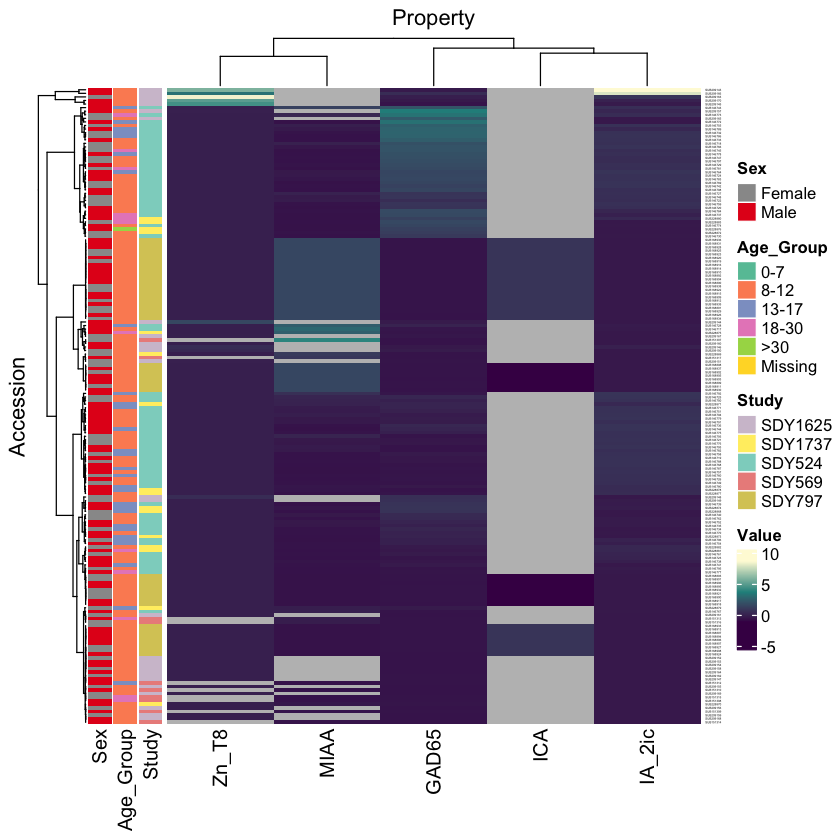

In [181]:
all_hm$hm_ward

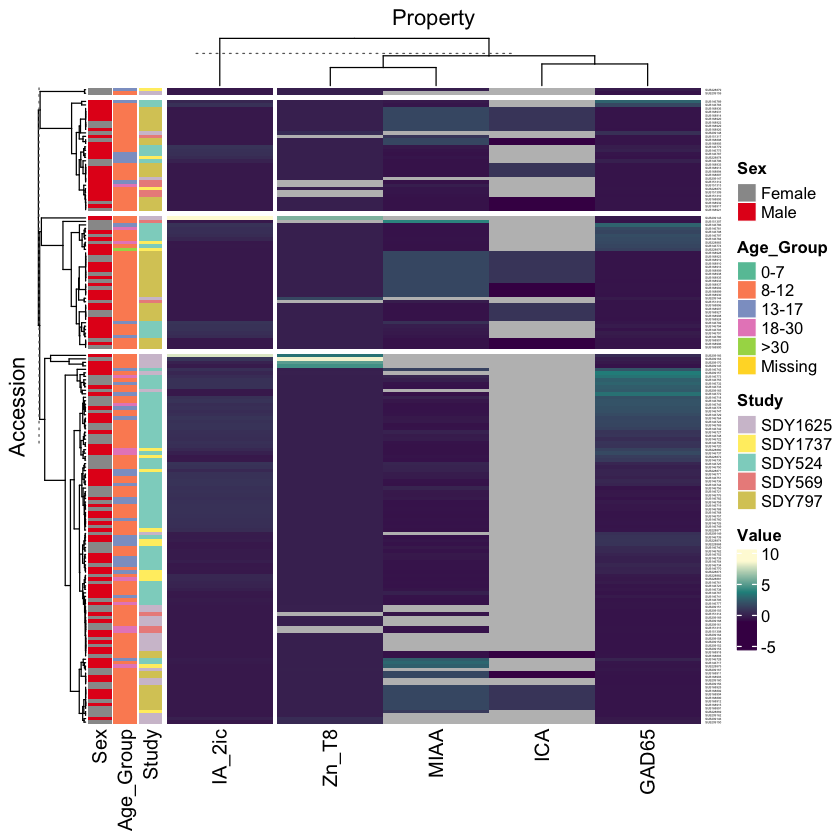

In [182]:
all_hm$hm_kmeans

**save for further work in federated learning with convolution neural networks**

In [194]:
write.csv(tidy_all,   "data/tidy_all.csv",   row.names = FALSE)
write.csv(tidy_797,   "data/tidy_797.csv",   row.names = FALSE)
write.csv(tidy_1625,  "data/tidy_1625.csv",  row.names = FALSE)
write.csv(tidy_524,   "data/tidy_524.csv",   row.names = FALSE)
write.csv(tidy_569,   "data/tidy_569.csv",   row.names = FALSE)
write.csv(tidy_1737,  "data/tidy_1737.csv",  row.names = FALSE)


In [183]:
# Pick the autoantibody you want
antibody_of_interest <- "GAD65"

tidy_single_gad65 <- tidy_all %>%
  filter(Property == "GAD65")

gad65_hm <- aa_heatmaps(tidy_single_gad65, scale_mode = "column", k_rows = 4, k_cols = 2)

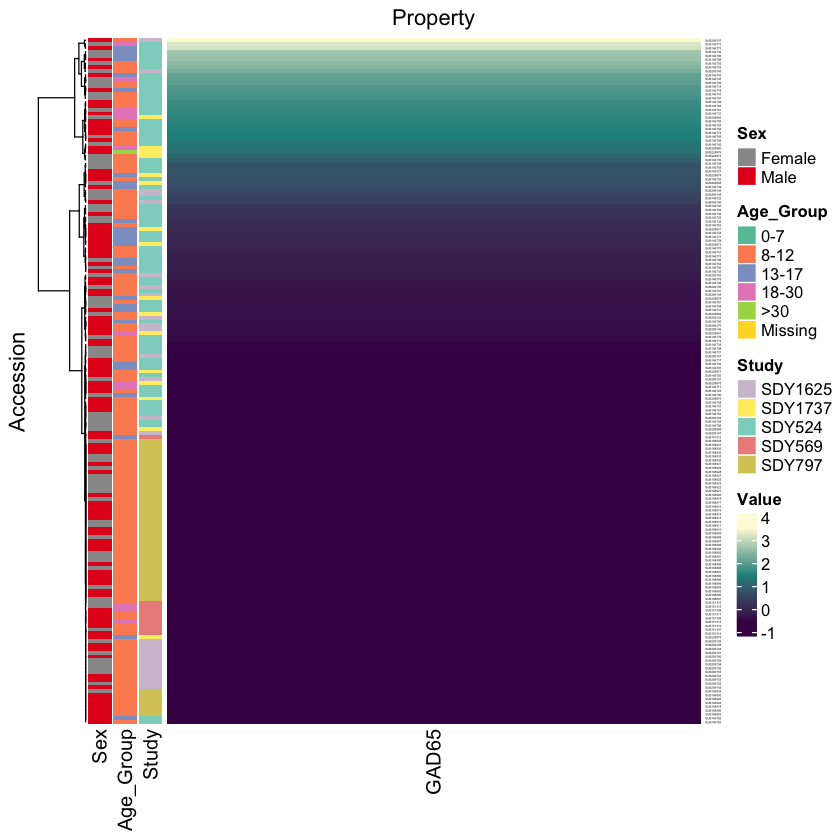

In [184]:
gad65_hm$hm_ward

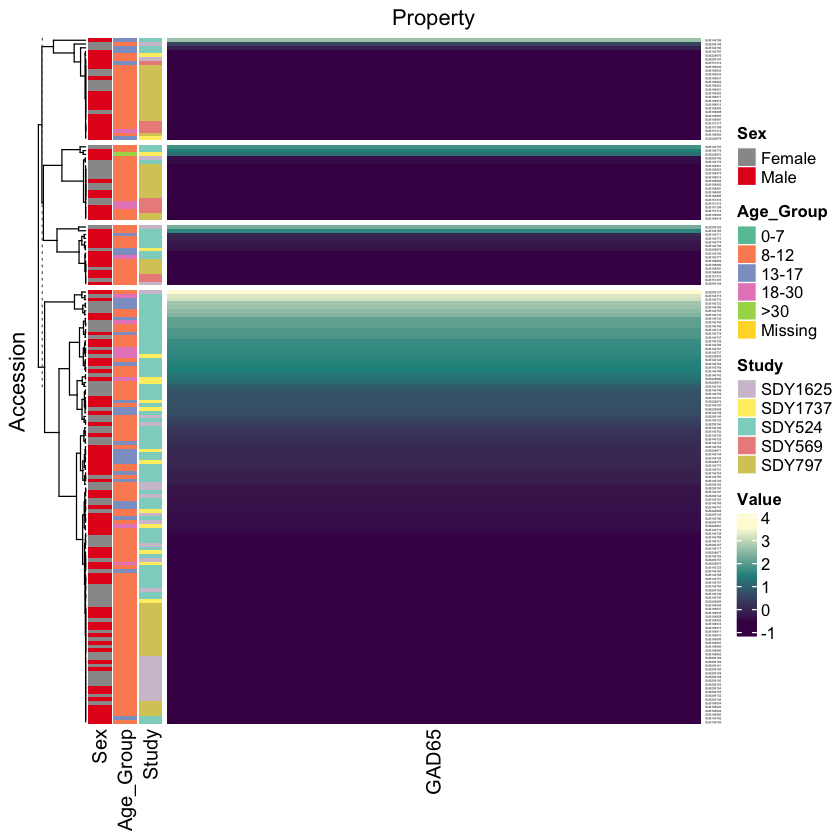

In [185]:
gad65_hm$hm_kmeans

In [186]:
tidy_all_clean <- tidy_all %>%
  group_by(Study, Property) %>%
  mutate(Value = scale(Value)[, 1]) %>%  # z-score within group
  ungroup()
summary(tidy_all_clean)
dim(tidy_all_clean)

  Accession             Sex              Age_Group     Property        
 Length:723         Length:723         0-7    :  0   Length:723        
 Class :character   Class :character   8-12   :559   Class :character  
 Mode  :character   Mode  :character   13-17  :115   Mode  :character  
                                       18-30  : 45                     
                                       >30    :  4                     
                                       Missing:  0                     
     Value            Study          
 Min.   :-2.4244   Length:723        
 1st Qu.:-0.6067   Class :character  
 Median :-0.1331   Mode  :character  
 Mean   : 0.0000                     
 3rd Qu.: 0.7214                     
 Max.   : 5.3588                     

[1] 723   6

In [187]:
colnames(tidy_all_clean)
tidy_all_clean <- tidy_all_clean %>%
  filter(!is.na(Accession), !is.na(Property), !is.na(Value))
dim(tidy_all_clean)

[1] "Accession" "Sex"       "Age_Group" "Property"  "Value"     "Study"

[1] 723   6

In [188]:
tidy_all_clean <- tidy_all_clean %>%
  group_by(Study, Property) %>%
  mutate(Value = scale(Value)[, 1]) %>%
  ungroup()


In [189]:
dupes <- tidy_all_clean %>%
  count(Accession, Property) %>%
  filter(n > 1)

if (nrow(dupes) > 0) print(dupes)


In [190]:
any(is.na(tidy_all_clean$Value)) # should be FALSE
length(unique(tidy_all_clean$Accession)) > 1 # TRUE
length(unique(tidy_all_clean$Property)) > 1 # TRUE


[1] FALSE

[1] TRUE

[1] TRUE

In [192]:
hm_scaled <- aa_heatmaps(tidy_all_clean, k_rows = 4, k_cols = 2, scale_mode="column")


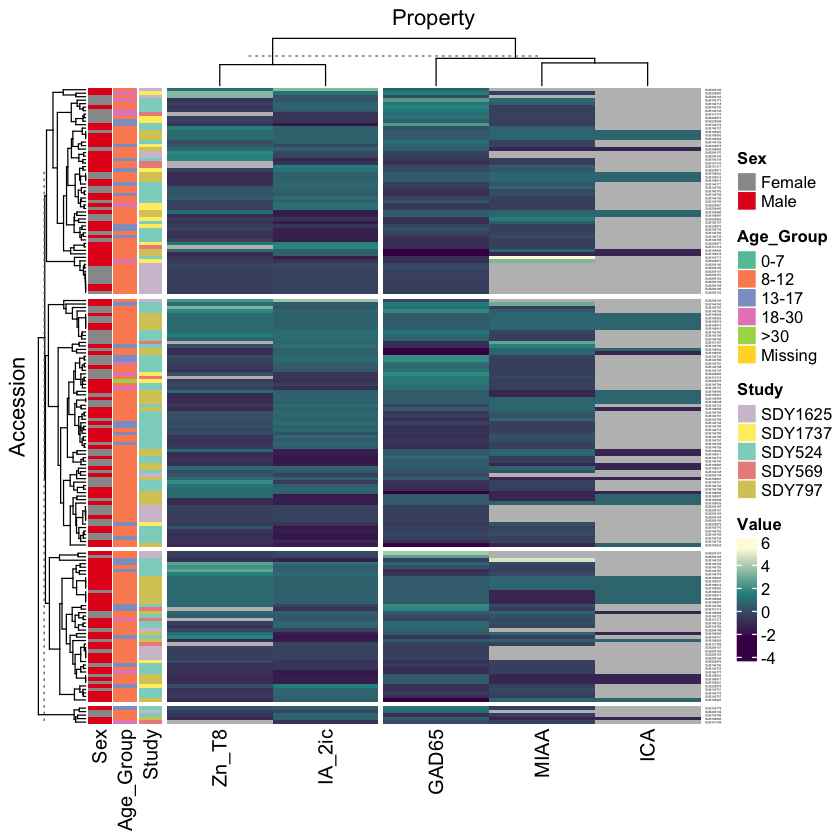

In [193]:
hm_scaled$hm_kmeans